<a href="https://colab.research.google.com/github/wilferalexander/Consumer_Spending_Prediction/blob/main/Consumer_Spending_Prediction_Layout1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROBLEMA DE NEGOCIO**


---




La necesidad de prever y optimizar el gasto de sus usuarios ha llevado a una empresa de comercio electrónico a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para desarrollar un modelo de machine learning que pueda predecir con precisión cuánto gastará un usuario al visitar dicho sitio web.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Importar correctamente y analizar y comprender el conjunto de datos proporcionado, realizar limpieza de datos, eliminar atributos que no aportan valor y manejar valores faltantes.

**2. Exploración y Feature Engineering:** Realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes, identificar variables llaves, codificación de variables categóricas y normalización/escalado de datos.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Linear Regression, Decision Tree Regressor, Random Forest Regressor, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como el error cuadrático medio (MSE), la raíz cuadrada del error cuadrático medio (RMSE) y el coeficiente de determinación (R²). Seleccionar el modelo con el mejor rendimiento para la predicción del gasto de los usuarios.

#**1. Configuración del Ambiente**


---




##**Diccionario de Datos**

- **channelGrouping:** el canal a través del cual el usuario llegó a la Tienda.
- **date:** la fecha en la que el usuario visitó la Tienda.
- **device:** las especificaciones del dispositivo utilizado para acceder a la Tienda.
- **fullVisitorId:** un identificador único para cada usuario de Google Merchandise Store.
- **geoNetwork:** esta sección contiene información sobre la geografía del usuario.
- **sessionId:** un identificador único para esta visita a la tienda.
- **socialEngagementType:** tipo de interacción, ya sea "socialmente comprometida" o "no socialmente comprometida".
- **totals:** esta sección contiene valores agregados en toda la sesión.
- **TrafficSource:** esta sección contiene información sobre la fuente de tráfico desde la que se originó la sesión.
- **visitId:** un identificador para esta sesión. Esto es parte del valor que normalmente se almacena como la cookie _utmb. Esto es exclusivo del usuario. Para obtener una identificación completamente única, debe utilizar una combinación de fullVisitorId y visitId.
- **visitNumber:** el número de sesión de este usuario. Si esta es la primera sesión, entonces se establece en 1.
- **visitStartTime:** la marca de tiempo (expresada como hora POSIX).

In [1]:
!pip install wget
import wget
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import FunctionTransformer
from joblib import dump, load
import missingno as msno ## Importamos la Librería Missingno, para poder visualizar nuestros valores nulos presentes
import geopandas as gpd
global df_traffic, resultados, modelo, modelo_clasificacion
theme = ["#DEF5E5", "#459E97", "#4B9ABB","#0A4361","#E68193",]

!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=50868f4ea80e05a12f340b2270687f2ef6cee55486beadd747ac2cd544c4d75d
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
Python 3.10.12
------
Name: pandas
Version: 1.5.3
------
Name: matplotlib
Version: 3.7.1


#**2. Preprocesamiento de Datos**


---


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/traffic_site.csv')
df.head(6)

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671
5,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9874029322760071744,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9874029322760071744_1472825224,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""7"", ""pageviews"": ""5"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472825224,1,1472825224


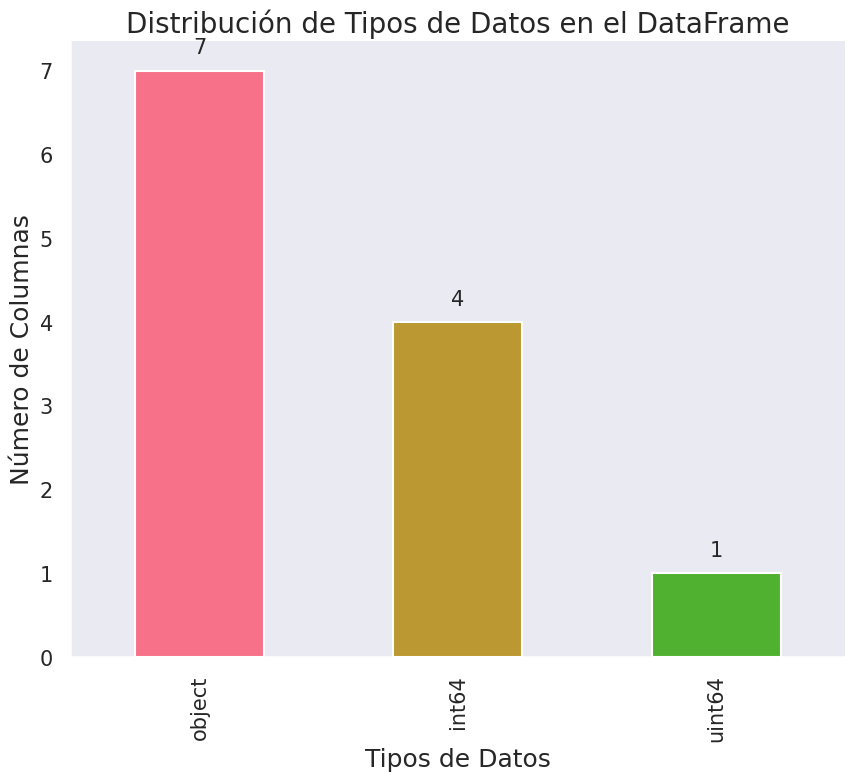

In [3]:
# Establecemos el estilo de Seaborn
sns.set(style="dark", context="talk", font_scale=1, palette="husl")
# Creamos una figura de tamaño personalizado
plt.figure(figsize=(10, 8))
# Contamos los tipos de datos y creamos un gráfico de barras
ax = df.dtypes.value_counts().plot(kind='bar', color=sns.color_palette("husl"), grid=False, fontsize=15)
# Etiquetamos las barras con el recuento de cada tipo de dato
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, height, ha='center', size=15)
# Personalizamos el gráfico
ax.set_xlabel("Tipos de Datos", fontsize=18)
ax.set_ylabel("Número de Columnas", fontsize=18)
ax.set_title("Distribución de Tipos de Datos en el DataFrame", fontsize=20)
# Eliminamos los bordes desagradables
sns.despine()
# Mostramos el grafico el gráfico
plt.show()

# Primer analis
Tenemos 7 columnas tipo objecto y 4 enteras y de tipo unit, ademas vemos que teneos columnas de tipo diccionario

In [4]:
df.shape

(12283, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   channelGrouping       12283 non-null  object
 1   date                  12283 non-null  int64 
 2   device                12283 non-null  object
 3   fullVisitorId         12283 non-null  uint64
 4   geoNetwork            12283 non-null  object
 5   sessionId             12283 non-null  object
 6   socialEngagementType  12283 non-null  object
 7   totals                12283 non-null  object
 8   trafficSource         12283 non-null  object
 9   visitId               12283 non-null  int64 
 10  visitNumber           12283 non-null  int64 
 11  visitStartTime        12283 non-null  int64 
dtypes: int64(4), object(7), uint64(1)
memory usage: 1.1+ MB


In [6]:
#Información de los datos
print("Número de filas: ",df.shape[0])
print("Número de Columnas:",df.shape[1])
print("Datos Duplicados",df.duplicated().sum())
print("Variables Categóricas: ",df.select_dtypes(include='object').shape[1])
print("Variables Numéricas: ",df.select_dtypes(exclude='object').shape[1])

Número de filas:  12283
Número de Columnas: 12
Datos Duplicados 0
Variables Categóricas:  7
Variables Numéricas:  5


1. Número de filas:  12283
2. Número de Columnas: 12
3. Datos Duplicados 0
4. Variables Categóricas:  7
5. Variables Numéricas:  5


In [17]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   channelGrouping       12283 non-null  object
 1   date                  12283 non-null  object
 2   device                12283 non-null  object
 3   fullVisitorId         12283 non-null  object
 4   geoNetwork            12283 non-null  object
 5   sessionId             12283 non-null  object
 6   socialEngagementType  12283 non-null  object
 7   totals                12283 non-null  object
 8   trafficSource         12283 non-null  object
 9   visitId               12283 non-null  object
 10  visitNumber           12283 non-null  int64 
 11  visitStartTime        12283 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.1+ MB


In [18]:
#separamos las columnas que poseen cadenas de texto que representan diccionarios
diccionarios = ['device','geoNetwork','totals','trafficSource']

Utilizamos apply(json.loads) para aplicar la función json.loads a cada elemento en la columna y convertir los datos JSON en diccionarios.
Usamos pd.json_normalize para convertir los diccionarios en un DataFrame, manejando automáticamente la concatenación y el







In [19]:
#  df_traffic[diccionarios[0]] contiene datos JSON en cada fila
df_device = pd.json_normalize(df_traffic[diccionarios[0]].apply(json.loads))
df_device.head(10)


,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory
0,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
1,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
2,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
3,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
4,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
5,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
6,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
7,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tablet
8,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
9,Firefox,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not availa

Utilizamos df_device.nunique() directamente para obtener el número de valores únicos en cada columna sin necesidad de bucles.
Eliminamos el DataFrame dict_device y creamos el DataFrame df_count directamente con las columnas 'Variable' y 'valores'.
Ordenamos el DataFrame df_count_sorted directamente en una sola línea utilizando sort_values.

In [20]:
# Contar el número de valores únicos en cada columna
df_count = df_device.nunique().reset_index()

# Renombrar las columnas del nuevo DataFrame
df_count.columns = ['Variable', 'valores']

# Ordenar el DataFrame por el número de valores únicos de manera descendente
df_count_sorted = df_count.sort_values(by='valores', ascending=False).reset_index(drop=True)

df_count_sorted


,Variable,valores
0,browser,22
1,operatingSystem,12
2,deviceCategory,3
3,isMobile,2
4,browserVersion,1
5,browserSize,1
6,operatingSystemVersion,1
7,mobileDeviceBranding,1
8,mobileDeviceModel,1
9,mobileInputSelector,1


In [21]:
# Obtén el nombre de las primeras cuatro variables con más valores únicos
selected_columns = df_count_sorted['Variable'].head(4).tolist()

# Filtra el DataFrame original para incluir solo estas columnas
df_device_selected = df_device[selected_columns]

df_device_selected


,browser,operatingSystem,deviceCategory,isMobile
0,Chrome,Windows,desktop,False
1,Chrome,Macintosh,desktop,False
2,Chrome,Macintosh,desktop,False
3,Safari,iOS,mobile,True
4,Safari,iOS,mobile,True
...,...,...,...,...
12278,Chrome,Windows,desktop,False
12279,Chrome,Android,mobile,True
12280,Chrome,Linux,desktop,False
12281,Chrome,Android,mobile,True


In [22]:
#vamos a eliminar columnas que no ayudan al proceso
df_device_selected = df_device_selected[['deviceCategory','isMobile']]
df_device_selected

,deviceCategory,isMobile
0,desktop,False
1,desktop,False
2,desktop,False
3,mobile,True
4,mobile,True
...,...,...
12278,desktop,False
12279,mobile,True
12280,desktop,False
12281,mobile,True


In [23]:
#  df_traffic[diccionarios[1]] contiene datos JSON en cada fila
df_geoNetwork = pd.json_normalize(df_traffic[diccionarios[1]].apply(json.loads))

df_geoNetwork.head(10)

,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation
0,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset
1,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,not available in demo dataset,not available in demo dataset,not available in demo dataset
2,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset
3,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,not available in demo dataset,not available in demo dataset,not available in demo dataset
4,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,not available in demo dataset,not available in demo dataset,not available in demo dataset
5,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset
6,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,cox.net,not available in demo dataset,not available in demo dataset,not available in demo dataset
7,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,level3.net,not available in demo dataset,not available in demo dataset,not available in demo dataset
8,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,not available in demo dataset,not available in demo dataset,not available in demo dataset
9,Europe,Southern Europe,Italy,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,teletu.it,not available in demo dataset,not available in demo dataset,not available in demo dataset


In [24]:
# Contar el número de valores únicos en cada columna
df_count_geoNetwork = df_geoNetwork.nunique().reset_index()

# Renombrar las columnas del nuevo DataFrame
df_count_geoNetwork.columns = ['Variable', 'valores']

# Ordenar el DataFrame por el número de valores únicos de manera descendente
df_count_sorted_geoNetwork = df_count_geoNetwork.sort_values(by='valores', ascending=False).reset_index(drop=True)

df_count_sorted_geoNetwork


,Variable,valores
0,networkDomain,1747
1,city,296
2,region,212
3,country,145
4,metro,53
5,subContinent,22
6,continent,6
7,cityId,1
8,latitude,1
9,longitude,1


Este código utiliza el método head(7) para seleccionar las primeras siete filas del DataFrame df_count_sorted y luego utiliza el método tolist() para obtener una lista con los nombres de esas variables. Después, se filtra el DataFrame original df_geoNetwork para incluir solo esas columnas.

In [26]:
# Obtén el nombre de las primeras siete variables con más valores únicos
selected_columns_geoNetwork = df_count_geoNetwork['Variable'].head(7).tolist()

# Filtra el DataFrame original para incluir solo estas columnas
df_geoNetwork_selected = df_geoNetwork[selected_columns_geoNetwork]

df_geoNetwork_selected

,continent,subContinent,country,region,metro,city,cityId
0,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset
1,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset
2,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset
3,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset
4,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset
...,...,...,...,...,...,...,...
12278,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset
12279,Europe,Western Europe,Germany,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset
12280,Asia,Southern Asia,India,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset
12281,Europe,Northern Europe,Lithuania,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset


In [27]:
# Lista de columnas relevantes
relevant_columns_geoNetwork = ['city', 'metro']

# Filtrar el DataFrame para incluir solo las columnas relevantes
df_geoNetwork_relevant = df_geoNetwork[relevant_columns_geoNetwork]

df_geoNetwork_relevant


,city,metro
0,Singapore,(not set)
1,not available in demo dataset,not available in demo dataset
2,Buenos Aires,(not set)
3,not available in demo dataset,not available in demo dataset
4,not available in demo dataset,not available in demo dataset
...,...,...
12278,not available in demo dataset,not available in demo dataset
12279,not available in demo dataset,not available in demo dataset
12280,not available in demo dataset,not available in demo dataset
12281,not available in demo dataset,not available in demo dataset


In [35]:
#  df_traffic[diccionarios[2]] contiene datos JSON en cada fila
df_total = pd.json_normalize(df_traffic[diccionarios[2]].apply(json.loads))
df_total.head(10)


,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,1,1,1,1,1,NaN
1,1,1,1,1,1,NaN
2,1,1,1,1,1,NaN
3,1,1,1,1,NaN,NaN
4,1,5,4,NaN,1,NaN
5,1,7,5,NaN,1,NaN
6,1,19,15,NaN,NaN,NaN
7,1,27,19,NaN,1,NaN
8,1,49,32,NaN,NaN,NaN
9,1,1,1,1,1,NaN


In [36]:
# Contar el número de valores únicos en cada columna
df_count_total = df_total.nunique().reset_index()

# Renombrar las columnas del nuevo DataFrame
df_count_total.columns = ['Variable', 'valores']

# Ordenar el DataFrame por el número de valores únicos de manera descendente
df_count_sorted_total = df_count_total.sort_values(by='valores', ascending=False).reset_index(drop=True)

df_count_sorted_total

,Variable,valores
0,transactionRevenue,146
1,hits,96
2,pageviews,75
3,visits,1
4,bounces,1
5,newVisits,1


In [37]:
df_total.isnull().sum()

visits                    0
hits                      0
pageviews                 0
bounces                6111
newVisits              2838
transactionRevenue    12119
dtype: int64

Despues de validar toda esta transformacion se observa que  tenemos columnas con valores nulos los cuales necesitamos trabajar antes de seguir con el proceso

In [38]:
df_total.fillna(0, inplace=True)
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   visits              12283 non-null  object
 1   hits                12283 non-null  object
 2   pageviews           12283 non-null  object
 3   bounces             12283 non-null  object
 4   newVisits           12283 non-null  object
 5   transactionRevenue  12283 non-null  object
dtypes: object(6)
memory usage: 575.9+ KB


ya sin nulos lo siguientes es volver los datos a numericos para un mejor tratamiento y poder crear un modelo.

ademas utilizaremos el parámetro errors='coerce' hace que los valores no numéricos se conviertan en NaN (valores perdidos), en lugar de generar un error.

In [39]:
df_total = df_total.apply(lambda x: pd.to_numeric(x, errors='coerce'))
df_total.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   visits              12283 non-null  int64
 1   hits                12283 non-null  int64
 2   pageviews           12283 non-null  int64
 3   bounces             12283 non-null  int64
 4   newVisits           12283 non-null  int64
 5   transactionRevenue  12283 non-null  int64
dtypes: int64(6)
memory usage: 575.9 KB


In [40]:
# Verificar si la columna 'visits' existe antes de eliminarla
if 'visits' in df_total.columns:
    df_totals = df_total.drop(columns='visits')

df_total


,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,1,1,1,1,1,0
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,1,1,1,0,0
4,1,5,4,0,1,0
...,...,...,...,...,...,...
12278,1,1,1,1,1,0
12279,1,1,1,1,1,0
12280,1,1,1,1,1,0
12281,1,2,2,0,0,0


In [41]:
# Suponiendo que df_traffic[diccionarios[3]] contiene datos JSON en cada fila
df_trafficSource = pd.json_normalize(df_traffic[diccionarios[3]].apply(json.loads))

df_trafficSource.head(10)


,campaign,source,medium,keyword,adwordsClickInfo.criteriaParameters,isTrueDirect,referralPath,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,adContent,campaignCode
0,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Data Share Promo,Partners,affiliate,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(not set),google,organic,(not provided),not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,(not set),google,organic,(not provided),not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,(not set),(direct),(none),NaN,not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,(not set),google,organic,(not provided),not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,(not set),youtube.com,referral,NaN,not available in demo dataset,NaN,/yt/about/it/,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df_trafficSource.columns

Index(['campaign', 'source', 'medium', 'keyword',
       'adwordsClickInfo.criteriaParameters', 'isTrueDirect', 'referralPath',
       'adwordsClickInfo.page', 'adwordsClickInfo.slot',
       'adwordsClickInfo.gclId', 'adwordsClickInfo.adNetworkType',
       'adwordsClickInfo.isVideoAd', 'adContent', 'campaignCode'],
      dtype='object')

In [43]:
columns_to_select = ['adwordsClickInfo.criteriaParameters', 'adwordsClickInfo.page', 'adwordsClickInfo.slot', 'adwordsClickInfo.gclId', 'adwordsClickInfo.adNetworkType', 'adwordsClickInfo.isVideoAd']
df_selected_columns = df_trafficSource[columns_to_select]

In [44]:
columns_to_drop = ['adwordsClickInfo.criteriaParameters', 'adwordsClickInfo.page', 'adwordsClickInfo.slot', 'adwordsClickInfo.gclId', 'adwordsClickInfo.adNetworkType', 'adwordsClickInfo.isVideoAd']

df_trafficSource = df_trafficSource.drop(columns=columns_to_drop)
df_trafficSource.head(5)


,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode
0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
1,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN
3,(not set),google,organic,(not provided),True,NaN,NaN,NaN
4,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN


In [45]:
# Contar el número de valores únicos en cada columna
df_count_trafficSource = df_trafficSource.nunique().reset_index()

# Renombrar las columnas del nuevo DataFrame
df_count_trafficSource.columns = ['Variable', 'valores']

# Ordenar el DataFrame por el número de valores únicos de manera descendente
df_count_sorted_trafficSource = df_count_trafficSource.sort_values(by='valores', ascending=False).reset_index(drop=True)

df_count_sorted_trafficSource


,Variable,valores
0,referralPath,197
1,keyword,128
2,source,76
3,adContent,15
4,campaign,7
5,medium,7
6,isTrueDirect,1
7,campaignCode,1


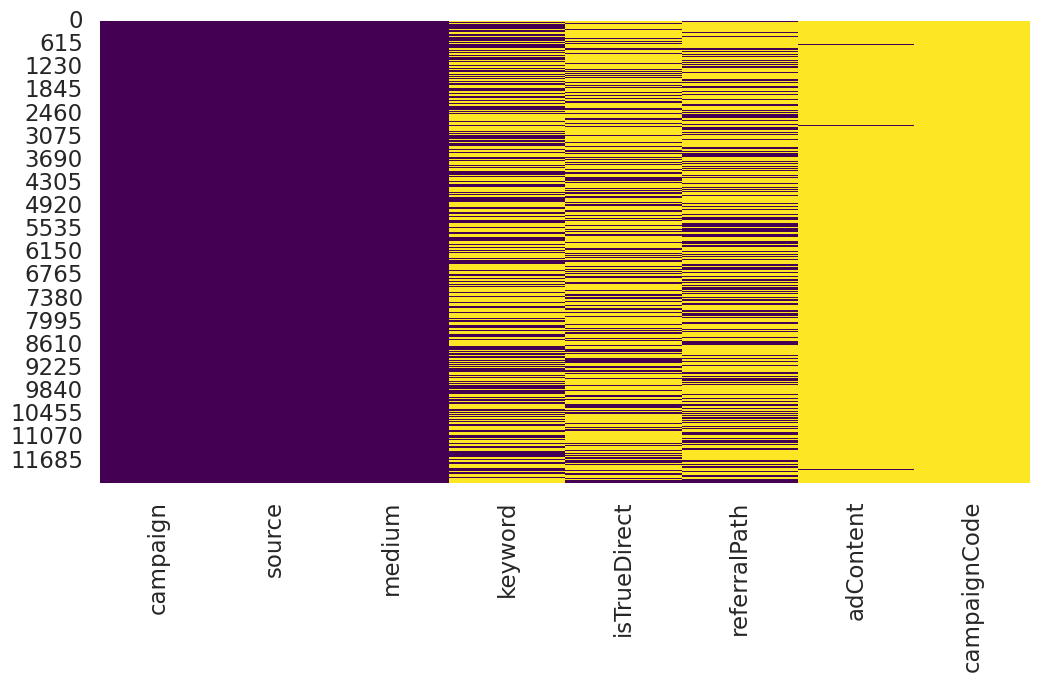

In [46]:
# Crear un mapa de calor de los valores nulos
plt.figure(figsize=(12, 6))
sns.heatmap(df_trafficSource.isnull(), cmap='viridis', cbar=False)
plt.show()

Tenemos 3 columnas sin nulos y varias columnas que contienen demasiados valores nulos, los vamos proceder a eliminar y solo dejaremos los valores sin nulos para el modelo


In [47]:
df_trafficSource = df_trafficSource[['campaign','source','medium','isTrueDirect']]
df_trafficSource

,campaign,source,medium,isTrueDirect
0,(not set),google,organic,NaN
1,(not set),google,organic,NaN
2,Data Share Promo,Partners,affiliate,NaN
3,(not set),google,organic,True
4,(not set),google,organic,NaN
...,...,...,...,...
12278,(not set),youtube.com,referral,NaN
12279,(not set),youtube.com,referral,NaN
12280,(not set),youtube.com,referral,NaN
12281,(not set),youtube.com,referral,True


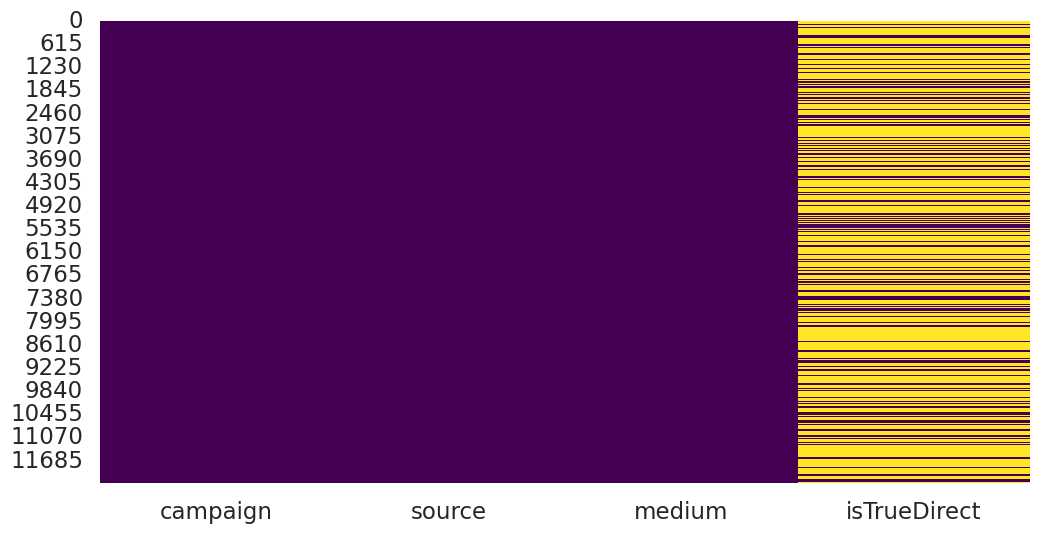

In [48]:
# Crear un mapa de calor de los valores nulos
plt.figure(figsize=(12, 6))
sns.heatmap(df_trafficSource.isnull(), cmap='viridis', cbar=False)
plt.show()

In [49]:
df_trafficSource['isTrueDirect'].fillna(False, inplace=True)
df_trafficSource.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   campaign      12283 non-null  object
 1   source        12283 non-null  object
 2   medium        12283 non-null  object
 3   isTrueDirect  12283 non-null  bool  
dtypes: bool(1), object(3)
memory usage: 300.0+ KB


In [165]:
df_trafficSource.head(10)

,campaign,source,medium,isTrueDirect
0,(not set),google,organic,False
1,(not set),google,organic,False
2,Data Share Promo,Partners,affiliate,False
3,(not set),google,organic,True
4,(not set),google,organic,False
5,(not set),google,organic,False
6,(not set),google,organic,True
7,(not set),(direct),(none),True
8,(not set),google,organic,True
9,(not set),youtube.com,referral,False


In [50]:
#crear un solo dataframe
df_traffic_final = df_traffic.copy()
df_traffic_final

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671
...,...,...,...,...,...,...,...,...,...,...,...,...
12278,Social,20170104,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",7330357551242339916,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",7330357551242339916_1483540608,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""referralPath"": ""/yt/about/pl/"", ""campaign"": ...",1483540608,1,1483540608
12279,Social,20170104,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",696320405243257438,"{""continent"": ""Europe"", ""subContinent"": ""Weste...",0696320405243257438_1483580407,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""referralPath"": ""/yt/about/"", ""campaign"": ""(n...",1483580407,1,1483580407
12280,Social,20170104,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",5437703324867866371,"{""continent"": ""Asia"", ""subContinent"": ""Souther...",5437703324867866371_1483592122,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""referralPath"": ""/yt/about/"", ""campaign"": ""(n...",1483592122,1,1483592122
12281,Social,20170104,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8869363093179043393,"{""continent"": ""Europe"", ""subContinent"": ""North...",8869363093179043393_1483601927,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""2""}","{""referralPath"": ""/yt/about/lt/"", ""campaign"": ...",1483601927,2,1483601927


In [51]:
# Concatenar los DataFrames horizontalmente
df_traffic_final = pd.concat([df_traffic_final, df_device, df_geoNetwork, df_totals, df_trafficSource], axis=1)

# Asegurarse de que no hay columnas duplicadas
df_traffic_final = df_traffic_final.loc[:,~df_traffic_final.columns.duplicated()]

df_traffic_final.head(10)


,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,isTrueDirect
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,0,(not set),google,organic,False
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,0,(not set),google,organic,False
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,0,Data Share Promo,Partners,affiliate,False
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649,Safari

In [ ]:
df_traffic_final = df_traffic_final.drop(columns = diccionarios)
df_traffic_final.info()

In [54]:
df_traffic_final['date'] = pd.to_datetime(df_traffic_final['date'], format='%Y%m%d')
df_traffic_final['visitStartTime'] = pd.to_datetime(df_traffic_final['visitStartTime'], unit='s')

In [124]:
df_traffic_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   channelGrouping            12283 non-null  object        
 1   date                       12283 non-null  datetime64[ns]
 2   fullVisitorId              12283 non-null  object        
 3   sessionId                  12283 non-null  object        
 4   socialEngagementType       12283 non-null  object        
 5   visitId                    12283 non-null  object        
 6   visitNumber                12283 non-null  int64         
 7   visitStartTime             12283 non-null  datetime64[ns]
 8   browser                    12283 non-null  object        
 9   browserVersion             12283 non-null  object        
 10  browserSize                12283 non-null  object        
 11  operatingSystem            12283 non-null  object        
 12  oper

In [55]:
df_traffic_final['transactionRevenue'] = df_traffic_final['transactionRevenue']/1000000
df_traffic_final['transactionRevenue'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 12283 entries, 0 to 12282
Series name: transactionRevenue
Non-Null Count  Dtype  
--------------  -----  
12283 non-null  float64
dtypes: float64(1)
memory usage: 96.1 KB


In [56]:
df_traffic_final.head(10)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,isTrueDirect
0,Organic Search,2016-09-02,9674781571160116268,9674781571160116268_1472804607,Not Socially Engaged,1472804607,1,2016-09-02 08:23:27,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,0.0,(not set),google,organic,False
1,Organic Search,2016-09-02,8590648239310839049,8590648239310839049_1472835928,Not Socially Engaged,1472835928,1,2016-09-02 17:05:28,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,0.0,(not set),google,organic,False
2,Affiliates,2016-09-02,9772828344252850532,9772828344252850532_1472856802,Not Socially Engaged,1472856802,1,2016-09-02 22:53:22,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,0.0,Data Share Promo,Partners,affiliate,False
3,Organic Search,2016-09-02,1350700416054916432,1350700416054916432_1472879649,Not Socially Engaged,1472879649,2,2016-09-03 05:14:09,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,0,0.0,(not set),google,organic,True
4,Organic Search,2016-09-02,1350700416054916432,1350700416054916432_1472829671,Not Socially Engaged,1472829671,1,2016-09-02 15:21:11,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not av

In [57]:
df_traffic_final = df_traffic_final.drop(columns= ['fullVisitorId','sessionId', 'visitId'])

In [58]:
df_traffic_final['socialEngagementType'].value_counts()

Not Socially Engaged    12283
Name: socialEngagementType, dtype: int64

In [59]:
df_traffic_final = df_traffic_final.drop(columns= ['socialEngagementType'])

In [60]:
df_traffic_final.sample(5)

,channelGrouping,date,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,isTrueDirect
10983,Referral,2017-04-19,8,2017-04-19 19:54:27,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Sunnyvale,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,6,6,0,0,0.0,(not set),gdeals.googleplex.com,referral,True
6093,Organic Search,2017-07-03,1,2017-07-04 03:26:35,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Americas,South America,Chile,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,vtr.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,0.0,(not set),google,organic,False
11689,Referral,2016-09-18,8,2016-09-18 22:59:39,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Mountain View,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,0,0.0,(not set),mall.googleplex.com,referral,True
9623,Direct,2017-04-27,1,2017-04-28 06:19:56,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,0.0,(not set),(direct),(none),True
1459,Organic Search,2017-02-13,4,2017-02-13 20:55:28,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Northern Europe,Sweden,Vastra Gotaland County,(not set),Gothenburg,not available in demo dataset,comhem.se,not available in demo dataset,not available in dem

## 3. ANÁLISIS EXPLORATORIO DE DATOS

### 3.1.1 ANÁLISIS UNIVARIADO:  'transactionRevenue'

In [61]:
# Contar el número de personas que consumieron y que no consumieron
conteo_consumidores = df_traffic_final['transactionRevenue'].astype(bool).value_counts()

# Mostrar los resultados
print("Número de consumidores:", conteo_consumidores[True])
print("Número de no consumidores:", conteo_consumidores[False])


Número de consumidores: 164
Número de no consumidores: 12119


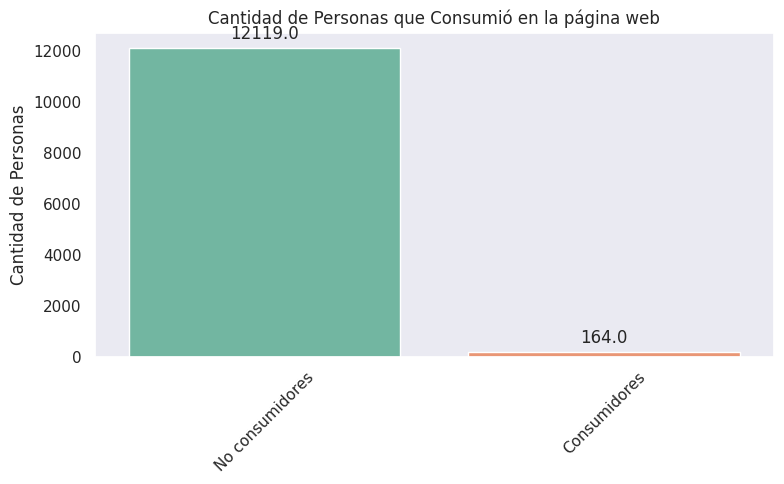

In [62]:
plt.figure(figsize=(8, 5))
sns.set(style="dark")

# Utiliza sns.countplot y almacena el objeto de los ejes
ax = sns.countplot(x=df_traffic_final['transactionRevenue'].apply(lambda x: 'Consumidores' if x != 0 else 'No consumidores'), palette="Set2")

# Añade etiquetas en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Rota las etiquetas en el eje x
plt.xticks(rotation=45)

plt.title('Cantidad de Personas que Consumió en la página web')
plt.xlabel('')
plt.ylabel('Cantidad de Personas')
plt.tight_layout()
plt.show()


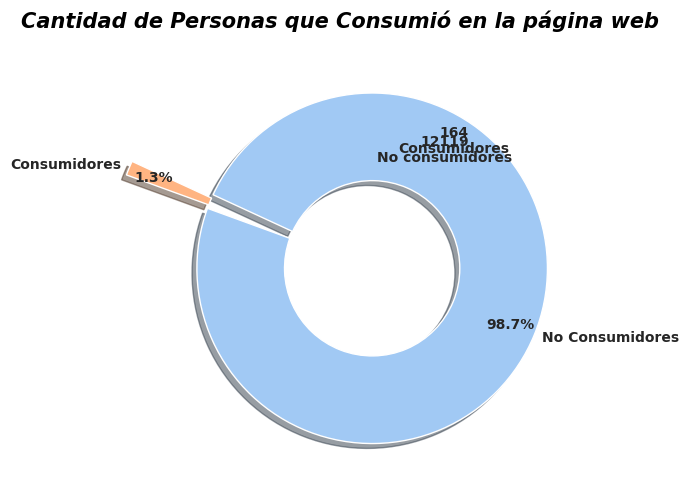

In [63]:
valores = df_traffic_final['transactionRevenue'].apply(lambda x: 'Consumidores' if x != 0 else 'No consumidores').value_counts()
etiqueta = ['No Consumidores','Consumidores']
explode = (0.2, 0.3)
colores = sns.color_palette("pastel")[0:2]  # Utiliza una paleta de colores más distintiva

plt.figure(figsize=(8, 5))
plt.pie(valores, labels=etiqueta, explode=explode, autopct='%1.1f%%', textprops={'fontsize': 10, 'weight': 'bold'},
        pctdistance=0.85, startangle=160, wedgeprops=dict(width=0.5, edgecolor='w'), labeldistance=1.05, colors=colores, shadow=True)

# Añade los porcentajes dentro de las porciones del gráfico
for i, p in enumerate(valores):
    plt.text(0.5 * (1 + explode[i]), 0.5 * (1 + explode[i]), f'{p}\n{valores.index[i]}', ha='center', va='center', fontsize=10, fontweight='bold')

plt.title('Cantidad de Personas que Consumió en la página web', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'Black',
    'family': 'sans-serif', 'style': 'italic'})
plt.tight_layout()
plt.show()


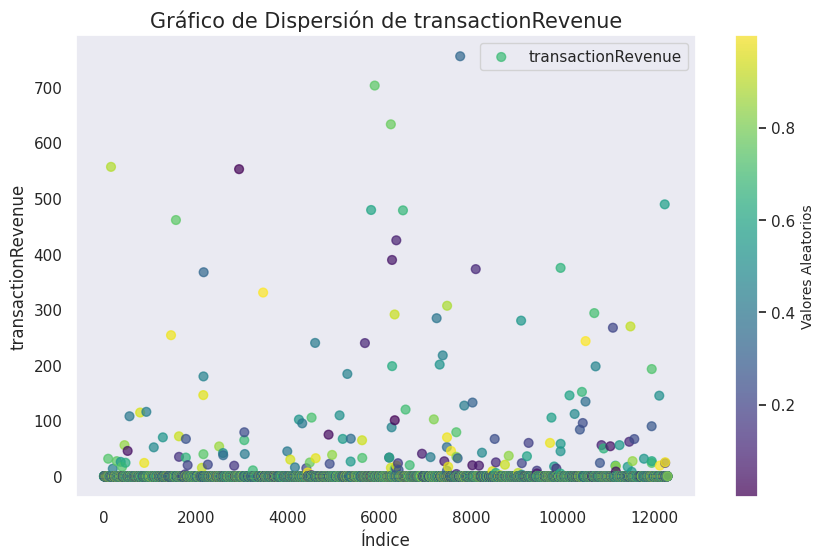

In [64]:
# Genera colores aleatorios para cada punto
colores = np.random.rand(len(df_traffic_final['transactionRevenue']))

plt.figure(figsize=(10, 6))
plt.scatter(range(len(df_traffic_final['transactionRevenue'])), df_traffic_final['transactionRevenue'],
            c=colores, cmap='viridis', alpha=0.7, s=40, label='transactionRevenue')

# Añade etiquetas a los ejes
plt.title('Gráfico de Dispersión de transactionRevenue', fontsize=15)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('transactionRevenue', fontsize=12)

# Añade una barra de color para representar los valores
barra_color = plt.colorbar()
barra_color.set_label('Valores Aleatorios', fontsize=10)

# Añade leyenda
plt.legend()

plt.grid(False)
plt.show()


al ver el grafico de dispersión observamos que son mas los visitantes que los que compran en la pagina


In [65]:
df_traffic_final.head()

,channelGrouping,date,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,isTrueDirect
0,Organic Search,2016-09-02,1,2016-09-02 08:23:27,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,0.0,(not set),google,organic,False
1,Organic Search,2016-09-02,1,2016-09-02 17:05:28,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,0.0,(not set),google,organic,False
2,Affiliates,2016-09-02,1,2016-09-02 22:53:22,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,0.0,Data Share Promo,Partners,affiliate,False
3,Organic Search,2016-09-02,2,2016-09-03 05:14:09,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,0,0.0,(not set),google,organic,True
4,Organic Search,2016-09-02,1,2016-09-02 15:21:11,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,not available in demo dataset,not available in demo dataset

**FEATURE ENGINEERING**

In [66]:

df_traffic_final['year'] = df_traffic_final.date.dt.year
df_traffic_final['month'] = df_traffic_final.date.dt.month
df_traffic_final['day'] = df_traffic_final.date.dt.day
df_traffic_final['quartermonth'] = df_traffic_final.date.dt.quarter
df_traffic_final['weekday'] = df_traffic_final.date.dt.day_name()
df_traffic_final.head()

,channelGrouping,date,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,isTrueDirect,year,month,day,quartermonth,weekday
0,Organic Search,2016-09-02,1,2016-09-02 08:23:27,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,0.0,(not set),google,organic,False,2016,9,2,3,Friday
1,Organic Search,2016-09-02,1,2016-09-02 17:05:28,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,0.0,(not set),google,organic,False,2016,9,2,3,Friday
2,Affiliates,2016-09-02,1,2016-09-02 22:53:22,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,0.0,Data Share Promo,Partners,affiliate,False,2016,9,2,3,Friday
3,Organic Search,2016-09-02,2,2016-09-03 05:14:09,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,0,0.0,(not set),google,organic,True,2016,9,2,3,Friday
4,Organic Search,2016-09-02,1,2016-09-02 15:21:11,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in de

In [67]:
# Categorizamos nuestra variable 'visitStartTime' para los diferentes rangos de horario
df_traffic_final['visitStartTime'] = pd.to_datetime(df_traffic_final['visitStartTime'])
df_traffic_final['time_range'] = pd.cut(df_traffic_final.visitStartTime.dt.hour, bins=[0, 6, 12, 18, 24],
                                  labels=['madrugada', 'mañana', 'tarde', 'noche'], ordered=False).astype('object')
df_traffic_final.head()

,channelGrouping,date,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,isTrueDirect,year,month,day,quartermonth,weekday,time_range
0,Organic Search,2016-09-02,1,2016-09-02 08:23:27,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,0.0,(not set),google,organic,False,2016,9,2,3,Friday,mañana
1,Organic Search,2016-09-02,1,2016-09-02 17:05:28,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,0.0,(not set),google,organic,False,2016,9,2,3,Friday,tarde
2,Affiliates,2016-09-02,1,2016-09-02 22:53:22,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,0.0,Data Share Promo,Partners,affiliate,False,2016,9,2,3,Friday,noche
3,Organic Search,2016-09-02,2,2016-09-03 05:14:09,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,0,0.0,(not set),google,organic,True,2016,9,2,3,Friday,madrugada
4,Organic Search,2016-09-02,1,2016-09-02 15:21:11,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Americas,Northern America,United States,not available in demo dataset,not avail

In [68]:
df_traffic_final = df_traffic_final.drop(columns=['date','visitStartTime'])
df_traffic_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   channelGrouping            12283 non-null  object 
 1   visitNumber                12283 non-null  int64  
 2   browser                    12283 non-null  object 
 3   browserVersion             12283 non-null  object 
 4   browserSize                12283 non-null  object 
 5   operatingSystem            12283 non-null  object 
 6   operatingSystemVersion     12283 non-null  object 
 7   isMobile                   12283 non-null  bool   
 8   mobileDeviceBranding       12283 non-null  object 
 9   mobileDeviceModel          12283 non-null  object 
 10  mobileInputSelector        12283 non-null  object 
 11  mobileDeviceInfo           12283 non-null  object 
 12  mobileDeviceMarketingName  12283 non-null  object 
 13  flashVersion               12283 non-null  obj

2. 1 ANÁLISIS UNIVARIADO:  VARIABLES NUMÉRICAS

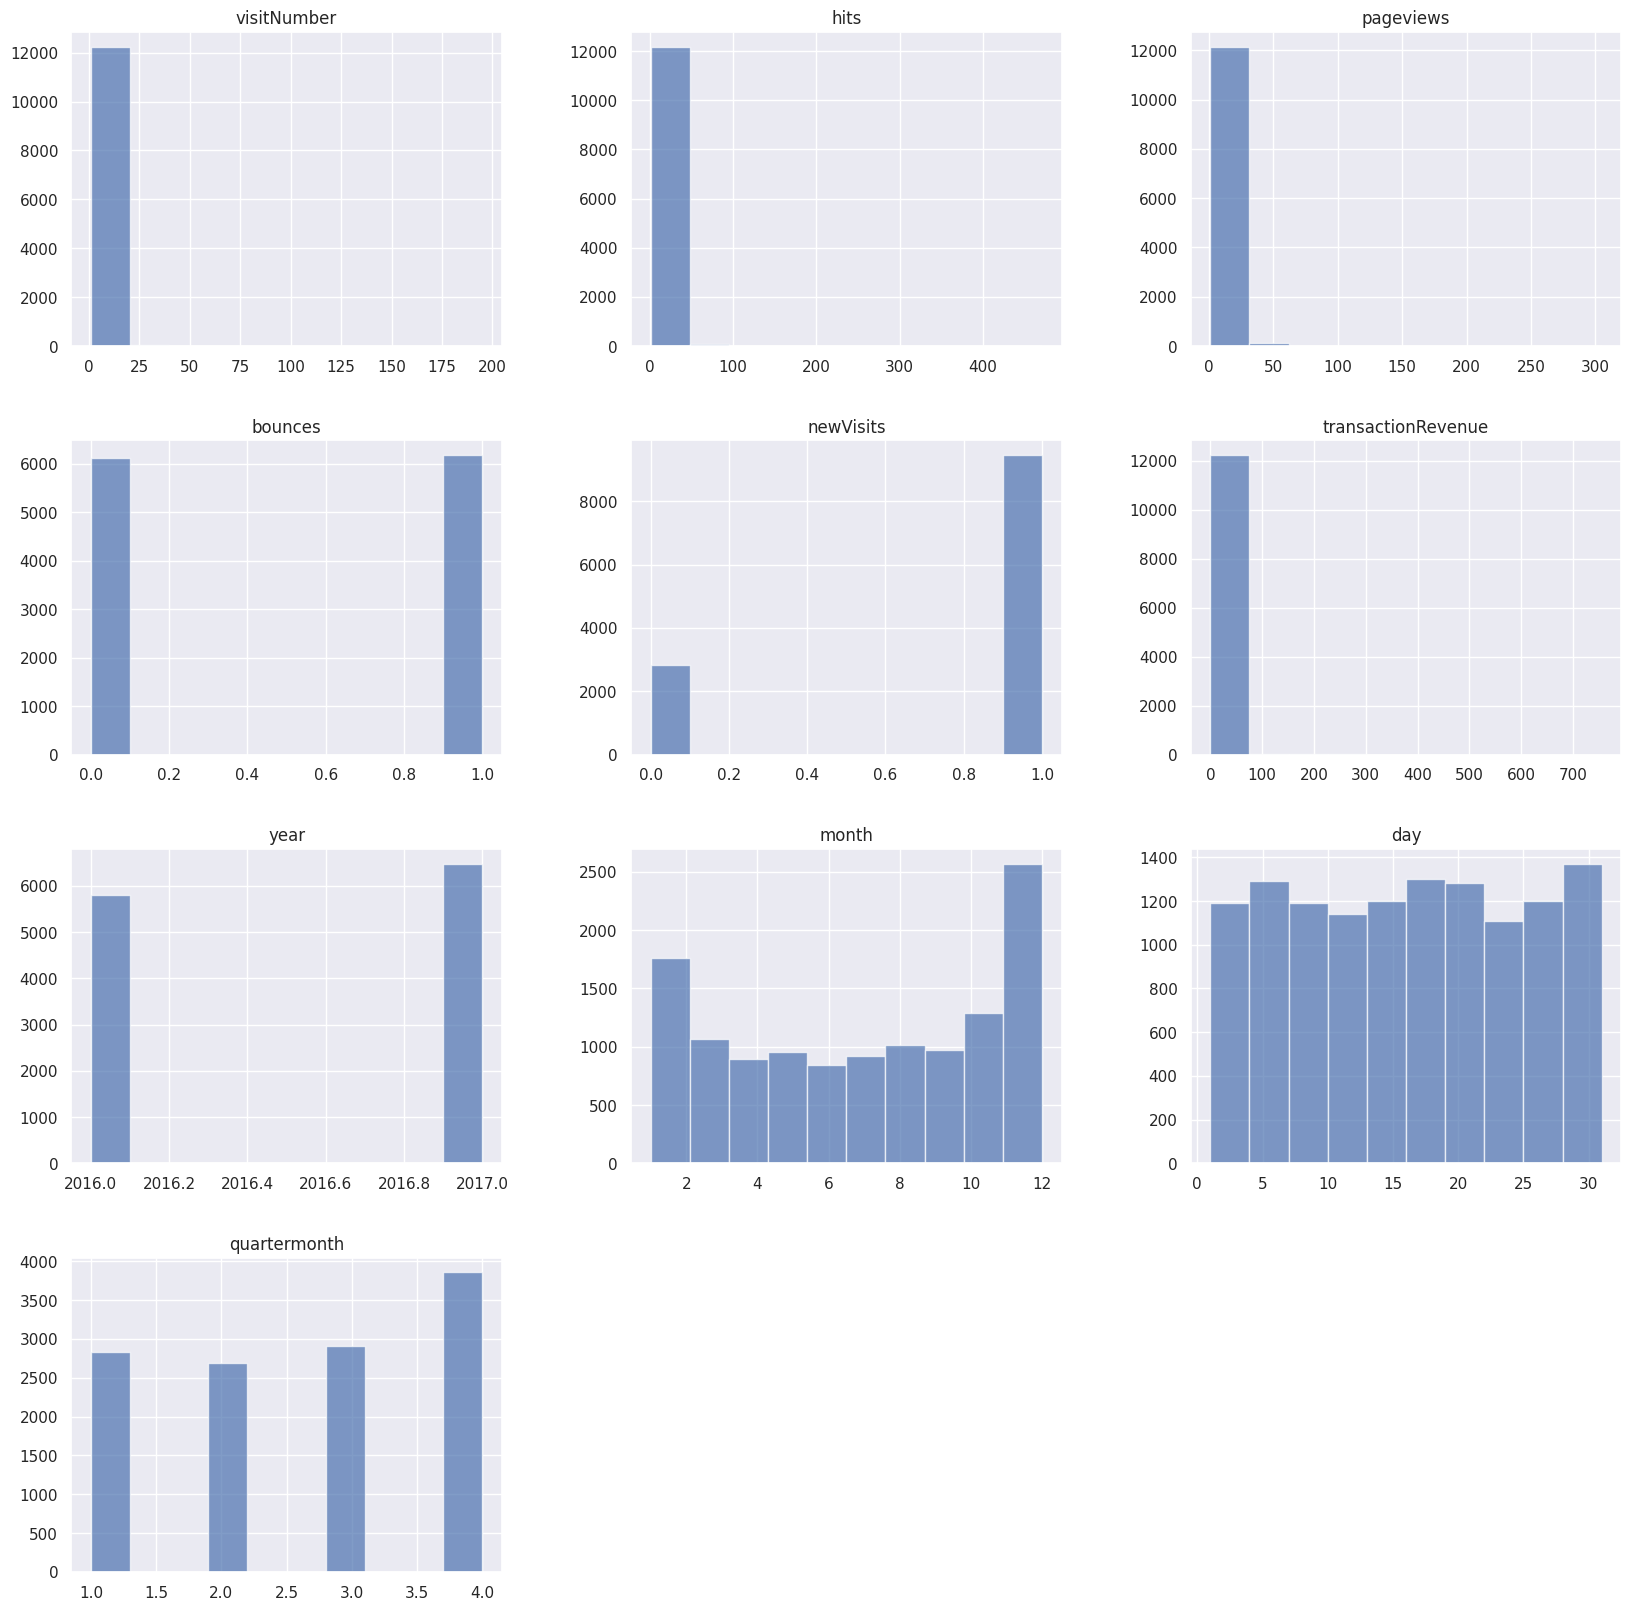

In [70]:
# Divide los atributos en subgráficos y aplica escala logarítmica
plt.rcParams['figure.figsize'] = [20,20];
sns.set(style="dark")
df_traffic_final.hist(alpha=0.7)
plt.show()


# ANÁLISIS UNIVARIADO: VARIABLES CATEGÓRICAS


In [71]:
# Identificar variables categóricas
variables_categoricas = df_traffic_final.select_dtypes(include='object').columns

# Mostrar las variables categóricas
print("Variables Categóricas:")
print(variables_categoricas)


Variables Categóricas:
Index(['channelGrouping', 'browser', 'browserVersion', 'browserSize',
       'operatingSystem', 'operatingSystemVersion', 'mobileDeviceBranding',
       'mobileDeviceModel', 'mobileInputSelector', 'mobileDeviceInfo',
       'mobileDeviceMarketingName', 'flashVersion', 'language', 'screenColors',
       'screenResolution', 'deviceCategory', 'continent', 'subContinent',
       'country', 'region', 'metro', 'city', 'cityId', 'networkDomain',
       'latitude', 'longitude', 'networkLocation', 'campaign', 'source',
       'medium', 'weekday', 'time_range'],
      dtype='object')


In [72]:
variables_categoricas_alto = ['city','metro','campaign','source']

In [73]:
variables_categoricas_filtradas = [variable for variable in variables_categoricas if variable not in variables_categoricas_alto]
variables_categoricas_filtradas

['channelGrouping',
 'browser',
 'browserVersion',
 'browserSize',
 'operatingSystem',
 'operatingSystemVersion',
 'mobileDeviceBranding',
 'mobileDeviceModel',
 'mobileInputSelector',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'flashVersion',
 'language',
 'screenColors',
 'screenResolution',
 'deviceCategory',
 'continent',
 'subContinent',
 'country',
 'region',
 'cityId',
 'networkDomain',
 'latitude',
 'longitude',
 'networkLocation',
 'medium',
 'weekday',
 'time_range']

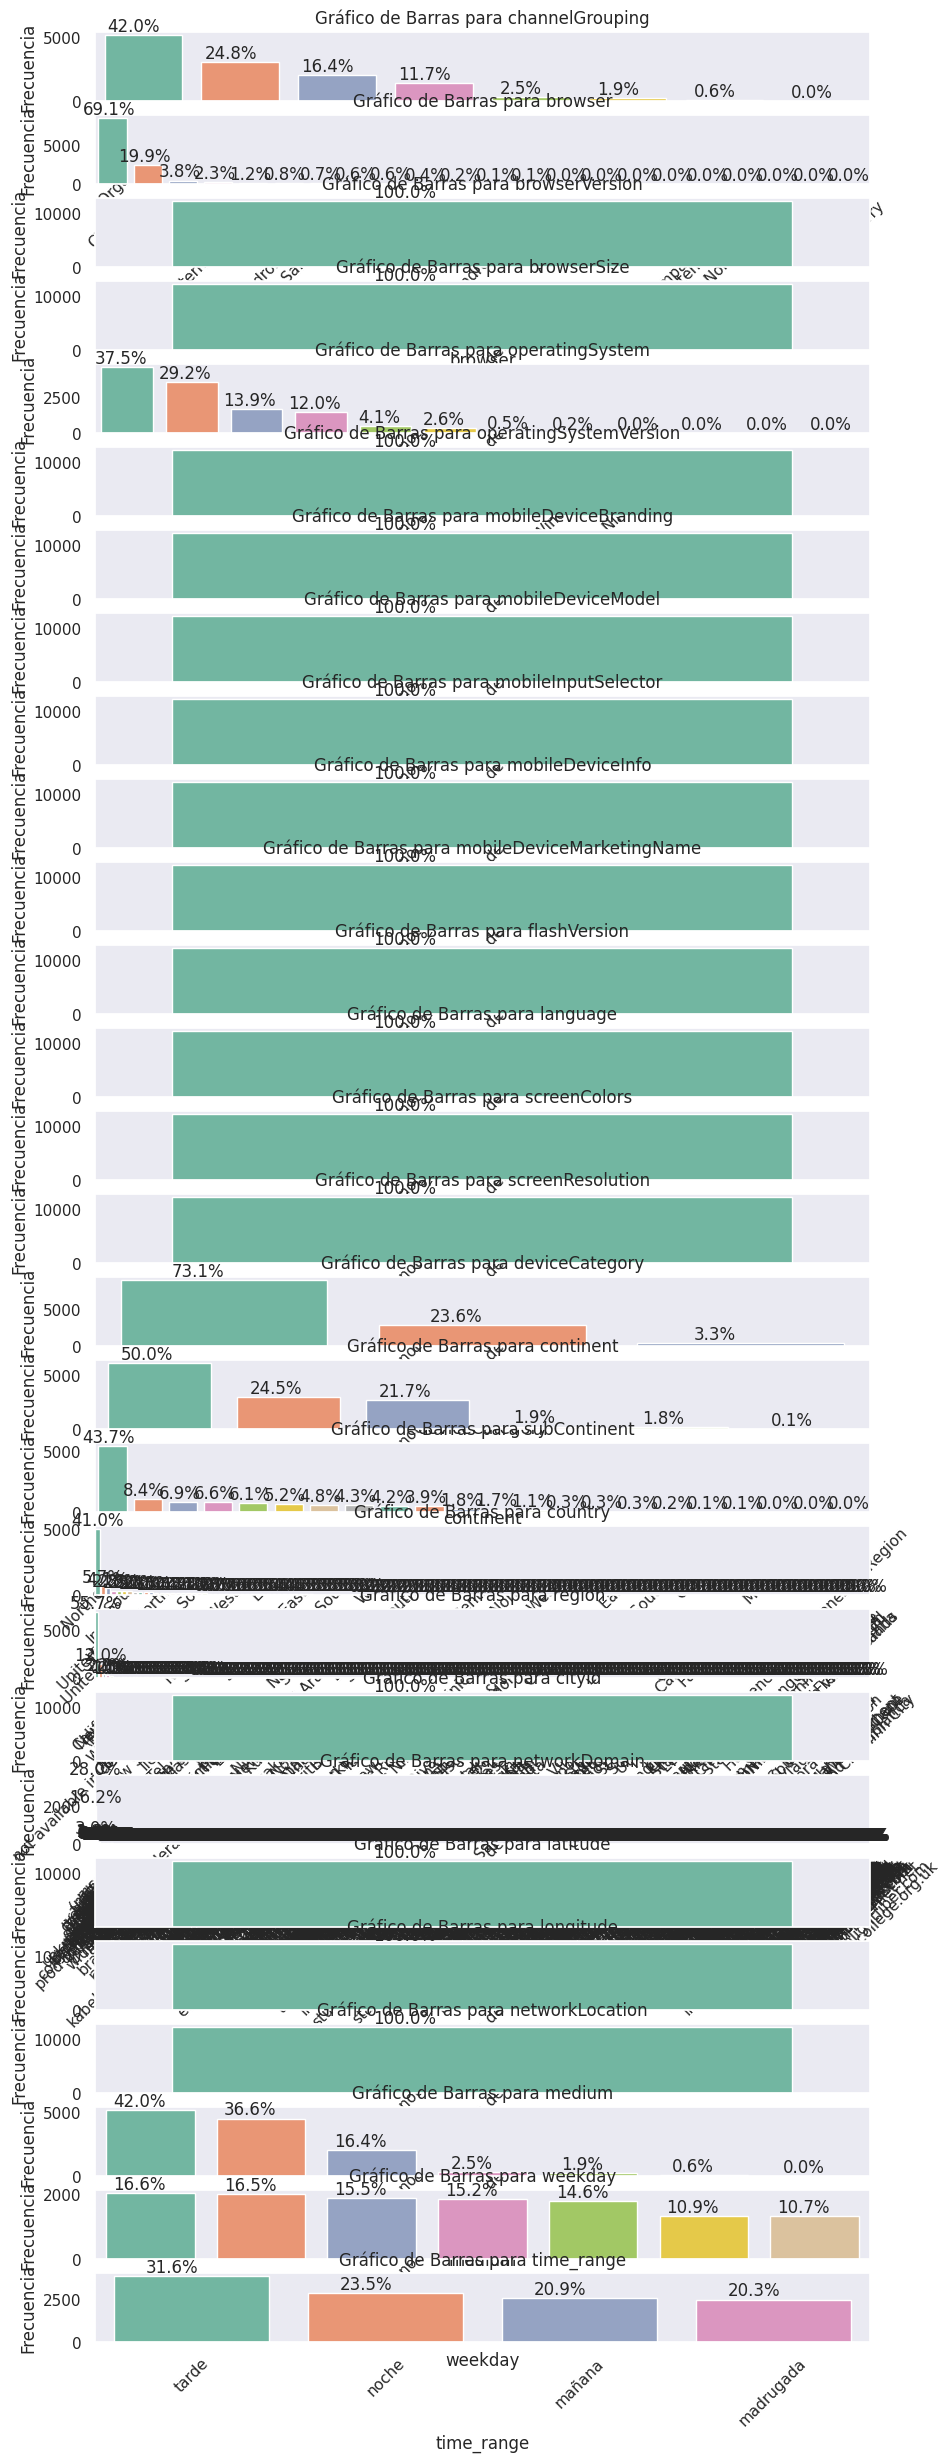

In [74]:
fig, axs = plt.subplots(nrows=len(variables_categoricas_filtradas), figsize=(10, 30))

# Iteramos sobre cada variable categórica y creamos un gráfico de barras para cada una
for i, variable in enumerate(variables_categoricas_filtradas):
    sns.countplot(data=df_traffic_final, x=variable, ax=axs[i], palette="Set2", order=df_traffic_final[variable].value_counts().index)
    axs[i].set_title(f'Gráfico de Barras para {variable}')
    axs[i].set_ylabel('Frecuencia')
    axs[i].grid(False)

    # Rotar etiquetas en el eje x si es necesario
    axs[i].tick_params(axis='x', rotation=45, labelrotation=45)

    # Agregar porcentajes en las barras
    total = len(df_traffic_final[variable])
    for p in axs[i].patches:
        porcentaje = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_height()
        axs[i].annotate(porcentaje, (x, y), ha='center', va='bottom')

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

plt.show()


In [75]:
df_traffic_final[variables_categoricas_alto]

,city,metro,campaign,source
0,Singapore,(not set),(not set),google
1,not available in demo dataset,not available in demo dataset,(not set),google
2,Buenos Aires,(not set),Data Share Promo,Partners
3,not available in demo dataset,not available in demo dataset,(not set),google
4,not available in demo dataset,not available in demo dataset,(not set),google
...,...,...,...,...
12278,not available in demo dataset,not available in demo dataset,(not set),youtube.com
12279,not available in demo dataset,not available in demo dataset,(not set),youtube.com
12280,not available in demo dataset,not available in demo dataset,(not set),youtube.com
12281,not available in demo dataset,not available in demo dataset,(not set),youtube.com


In [76]:
df_traffic_final.replace('not available in demo dataset', 'not available', inplace=True)
df_traffic_final.replace('Retail (DO NOT EDIT owners nophakun and tianyu)', 'Retail', inplace=True)
df_traffic_final.replace('San Francisco-Oakland-San Jose CA', 'San Francisco', inplace=True)
df_traffic_final.replace('AW - Dynamic Search Ads Whole Site', 'AW - Dynamic Search', inplace=True)

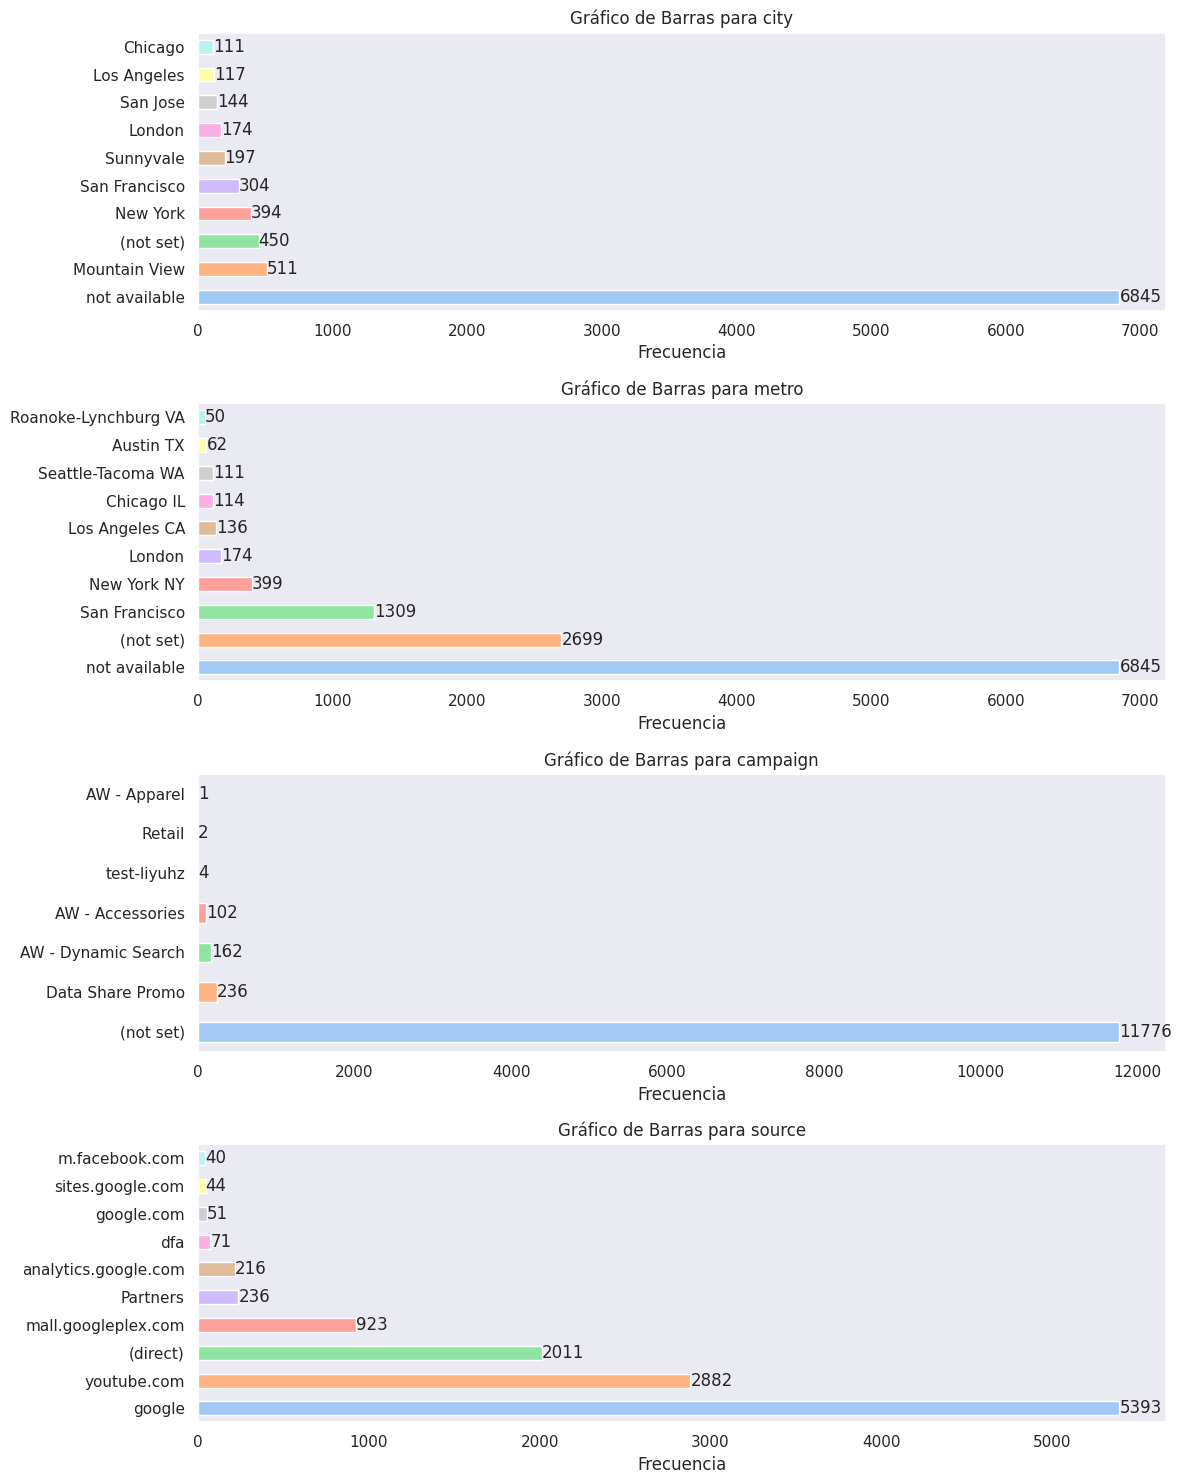

In [77]:
fig, axs = plt.subplots(nrows=df_traffic_final[['city','metro','campaign','source']].shape[1], figsize=(12, 15))

# Iteramos sobre cada variable cualitativa y creamos un gráfico de barras horizontal para cada una
for i, variable in enumerate(list(df_traffic_final[['city','metro','campaign','source']].columns)):
    # Calculamos el recuento de cada valor único en la columna y seleccionamos el Top10
    top_10_categorias = df_traffic_final[variable].value_counts().head(10)

    # Creamos el gráfico de barras
    top_10_categorias.plot(kind='barh', color=sns.color_palette("pastel"), ax=axs[i])

    axs[i].set_title(f'Gráfico de Barras para {variable}')
    axs[i].set_xlabel('Frecuencia')
    axs[i].grid(False)

    # Añadir etiquetas a las barras
    for index, value in enumerate(top_10_categorias):
        axs[i].text(value + 0.1, index, str(value), ha='left', va='center')

    # Rotar etiquetas en el eje y si es necesario
    axs[i].tick_params(axis='y', rotation=0)

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

plt.show()


ANÁLISIS BIVARIADO

In [78]:
from sklearn.preprocessing import LabelEncoder

# Lista de variables categóricas que deseas codificar
variables_categ = ['city', 'metro', 'campaign', 'source']

# Diccionario para almacenar los transformadores
label_encoders = {}

# Aplicar LabelEncoder a las variables categóricas seleccionadas
for columna in variables_categ:
    lbl = LabelEncoder()
    strings = list(df_traffic_final[columna].values.astype('str'))
    lbl.fit(strings)
    df_traffic_final[columna] = lbl.transform(strings)

    # Guardar el transformador en el diccionario
    label_encoders[columna] = lbl

# Mostrar el diccionario de transformadores
print("Transformadores LabelEncoder:")
print(label_encoders)


Transformadores LabelEncoder:
{'city': LabelEncoder(), 'metro': LabelEncoder(), 'campaign': LabelEncoder(), 'source': LabelEncoder()}


In [79]:
df_traffic_final

,channelGrouping,visitNumber,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,isTrueDirect,year,month,day,quartermonth,weekday,time_range
0,Organic Search,1,Chrome,not available,not available,Windows,not available,False,not available,not available,not available,not available,not available,not available,not available,not available,not available,desktop,Asia,Southeast Asia,Singapore,(not set),0,250,not available,unknown.unknown,not available,not available,not available,1,1,1,1,0.0,0,23,organic,False,2016,9,2,3,Friday,mañana
1,Organic Search,1,Chrome,not available,not available,Macintosh,not available,False,not available,not available,not available,not available,not available,not available,not available,not available,not available,desktop,Europe,Eastern Europe,Poland,not available,52,295,not available,tpnet.pl,not available,not available,not available,1,1,1,1,0.0,0,23,organic,False,2016,9,2,3,Friday,tarde
2,Affiliates,1,Chrome,not available,not available,Macintosh,not available,False,not available,not available,not available,not available,not available,not available,not available,not available,not available,desktop,Americas,South America,Argentina,Buenos Aires,0,43,not available,phonevision.com.ar,not available,not available,not available,1,1,1,1,0.0,4,3,affiliate,False,2016,9,2,3,Friday,noche
3,Organic Search,2,Safari,not available,not available,iOS,not available,True,not available,not available,not available,not available,not available,not available,not available,not available,not available,mobile,Americas,Northern America,United States,not available,52,295,not available,comcast.net,not available,not available,not available,1,1,1,0,0.0,0,23,organic,True,2016,9,2,3,Friday,madrugada
4,Organic Search,1,Safari,not available,not available,iOS,not available,True,not available,not available,not available,not available,not available,not available,not available,not available,not available,mobile,Americas,Northern America,United States,not available,52,295,not available,att.net,not available,not available,not available,5,4,0,1,0.0,0,23,organic,False,2016,9,2,3,Friday,tarde
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,Social,1,Chrome,not available,not available,Windows,not available,False,not available,not available,not available,not available,not available,not available,not available,not available,not available,desktop,Europe,Eastern Europe,Poland,not available,52,295,not available,unknown.unknown,not available,not available,not available,1,1,1,1,0.0,0,75,referral,False,2017,1,4,1,Wednesday,tarde
12279,Social,1,Chrome,not available,not available,Android,not available,True,not available,not available,not available,not available,not available,not available,not available,not available,not available,mobile,Europe,Western Europe,Germany,not available,52,295,not available,vodafone-ip.de,not available,not available,not available,1,1,1,1,0.0,0,75,referral,False,2017,1,4,1,Wednesday,madrugada
12280,Social,1,Chrome,not available,not available,Linux,not available,False,not available,not available,not available,not available,not available,not available,not available,not available,not available,desktop,Asia,Southern Asia,India,not available,52,295,not available,(not set),not available,not available,not available,1,1,1,1,0.0,0,75,referral,False,2017,1,4,1,Wednesday,madrugada
12281,Social,2,Chrome,not available,not available,Android,not available,True,not available,not available,not available,not available,not available,not available,not 

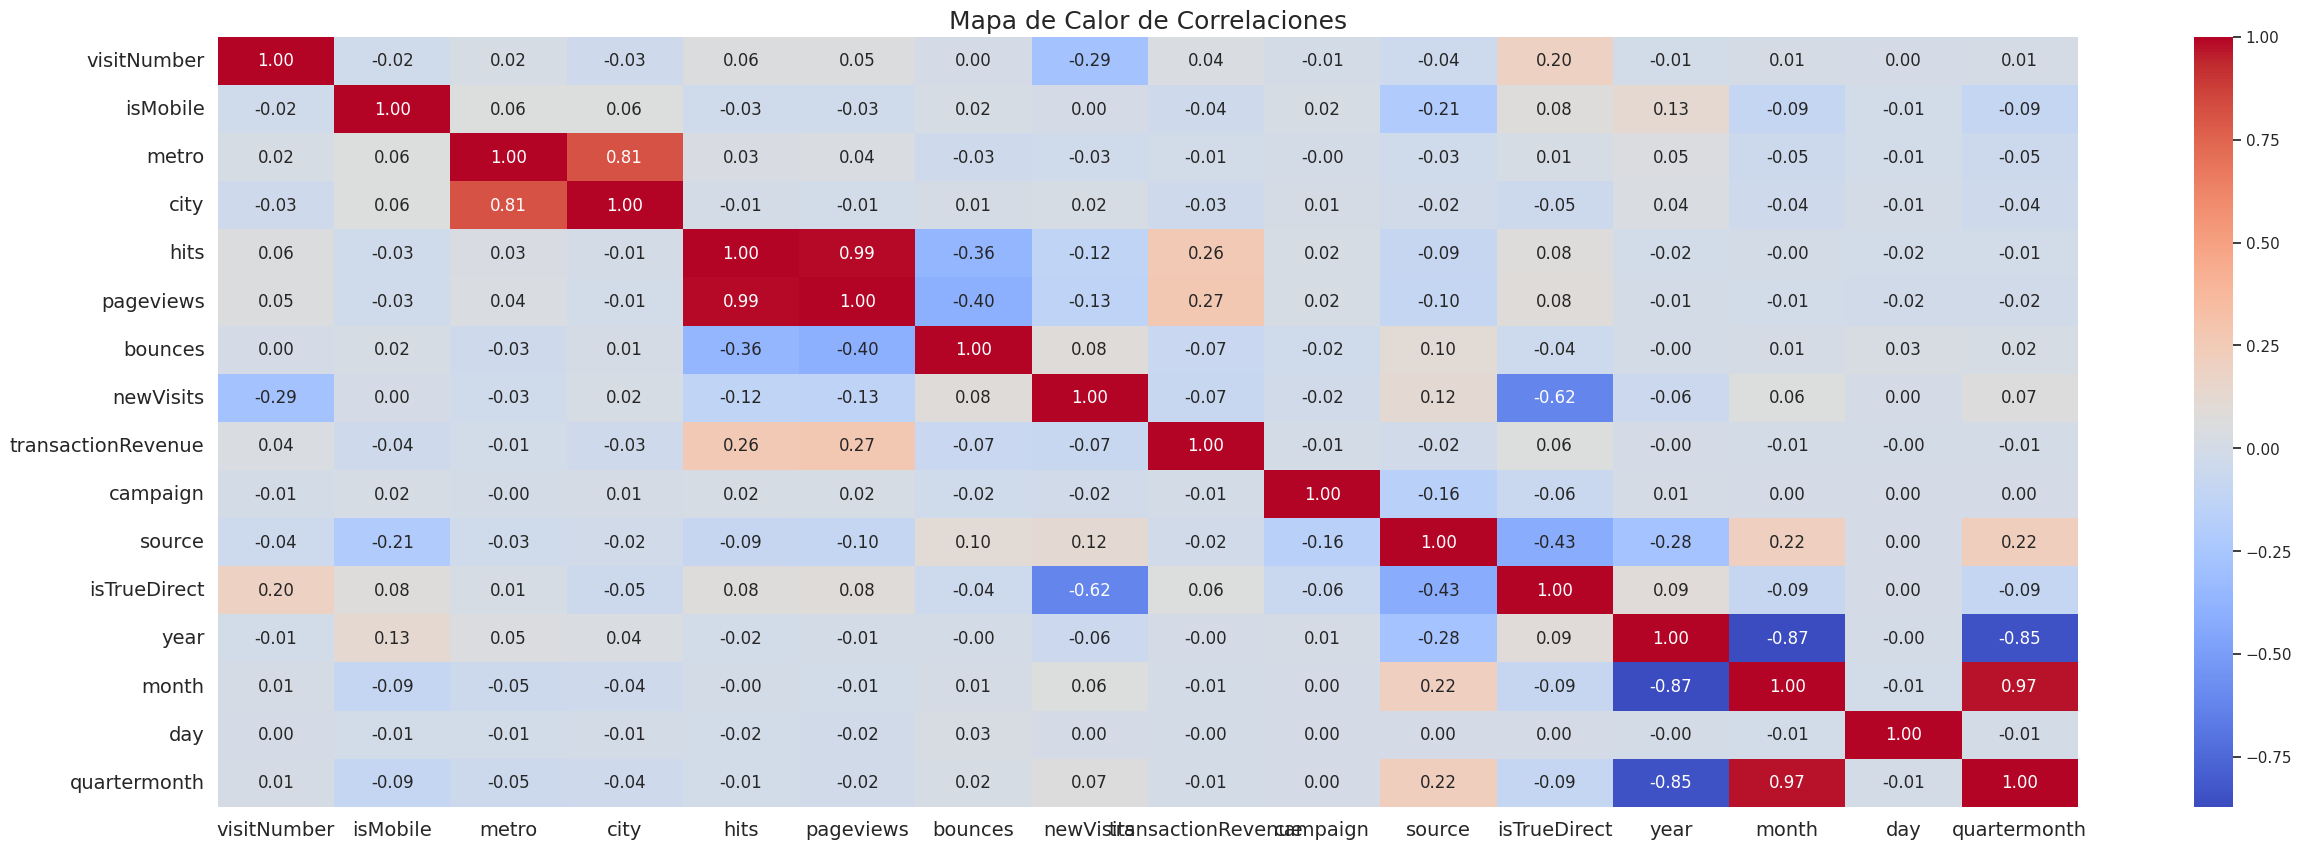

In [80]:
plt.figure(figsize=(30, 10))
heatmap = sns.heatmap(df_traffic_final.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major', labelsize=14)
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

In [81]:
variables_eliminar = ['metro','year','day','quartermonth','isMobile']

In [83]:
df_traffic_new = df_traffic_final.copy()
df_traffic_new = df_traffic_new.drop(columns=variables_eliminar)
df_traffic_new

,channelGrouping,visitNumber,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,city,cityId,networkDomain,latitude,longitude,networkLocation,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,isTrueDirect,month,weekday,time_range
0,Organic Search,1,Chrome,not available,not available,Windows,not available,not available,not available,not available,not available,not available,not available,not available,not available,not available,desktop,Asia,Southeast Asia,Singapore,(not set),250,not available,unknown.unknown,not available,not available,not available,1,1,1,1,0.0,0,23,organic,False,9,Friday,mañana
1,Organic Search,1,Chrome,not available,not available,Macintosh,not available,not available,not available,not available,not available,not available,not available,not available,not available,not available,desktop,Europe,Eastern Europe,Poland,not available,295,not available,tpnet.pl,not available,not available,not available,1,1,1,1,0.0,0,23,organic,False,9,Friday,tarde
2,Affiliates,1,Chrome,not available,not available,Macintosh,not available,not available,not available,not available,not available,not available,not available,not available,not available,not available,desktop,Americas,South America,Argentina,Buenos Aires,43,not available,phonevision.com.ar,not available,not available,not available,1,1,1,1,0.0,4,3,affiliate,False,9,Friday,noche
3,Organic Search,2,Safari,not available,not available,iOS,not available,not available,not available,not available,not available,not available,not available,not available,not available,not available,mobile,Americas,Northern America,United States,not available,295,not available,comcast.net,not available,not available,not available,1,1,1,0,0.0,0,23,organic,True,9,Friday,madrugada
4,Organic Search,1,Safari,not available,not available,iOS,not available,not available,not available,not available,not available,not available,not available,not available,not available,not available,mobile,Americas,Northern America,United States,not available,295,not available,att.net,not available,not available,not available,5,4,0,1,0.0,0,23,organic,False,9,Friday,tarde
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,Social,1,Chrome,not available,not available,Windows,not available,not available,not available,not available,not available,not available,not available,not available,not available,not available,desktop,Europe,Eastern Europe,Poland,not available,295,not available,unknown.unknown,not available,not available,not available,1,1,1,1,0.0,0,75,referral,False,1,Wednesday,tarde
12279,Social,1,Chrome,not available,not available,Android,not available,not available,not available,not available,not available,not available,not available,not available,not available,not available,mobile,Europe,Western Europe,Germany,not available,295,not available,vodafone-ip.de,not available,not available,not available,1,1,1,1,0.0,0,75,referral,False,1,Wednesday,madrugada
12280,Social,1,Chrome,not available,not available,Linux,not available,not available,not available,not available,not available,not available,not available,not available,not available,not available,desktop,Asia,Southern Asia,India,not available,295,not available,(not set),not available,not available,not available,1,1,1,1,0.0,0,75,referral,False,1,Wednesday,madrugada
12281,Social,2,Chrome,not available,not available,Android,not available,not available,not available,not available,not available,not available,not available,not available,not available,not available,mobile,Europe,Northern Europe,Lithuania,not available,295,not available,cgates.lt,not available,not available,not available,2,2,0,0,0.0,0,75,referral,True,1,Wednes

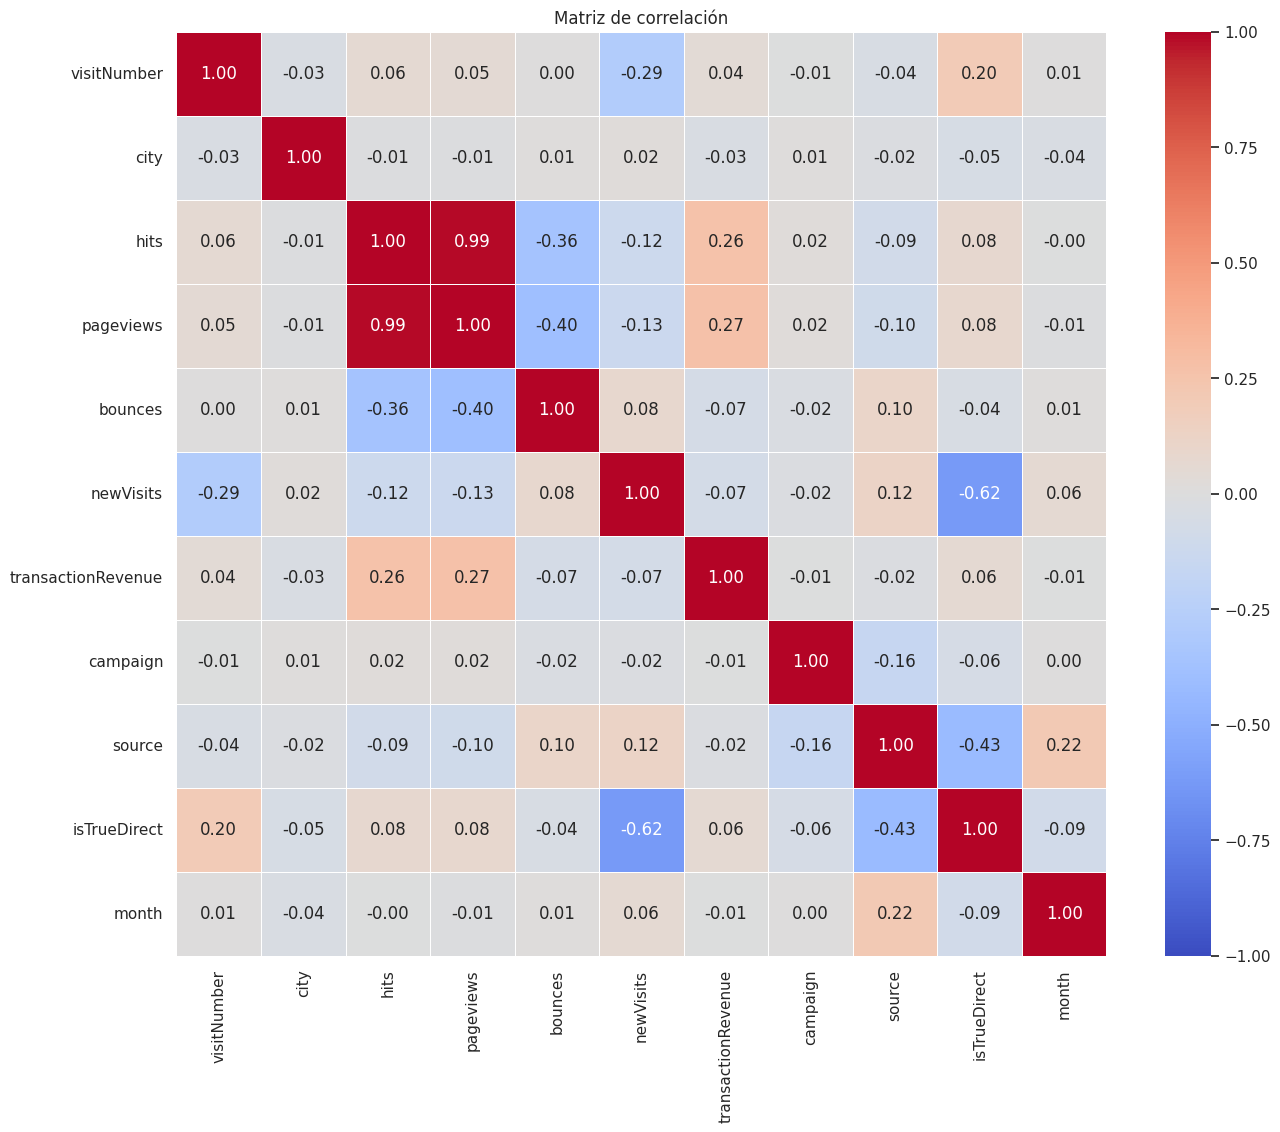

In [84]:
plt.figure(figsize=(15, 12))
sns.heatmap(df_traffic_new.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

In [85]:
df_traffic_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   channelGrouping            12283 non-null  object 
 1   visitNumber                12283 non-null  int64  
 2   browser                    12283 non-null  object 
 3   browserVersion             12283 non-null  object 
 4   browserSize                12283 non-null  object 
 5   operatingSystem            12283 non-null  object 
 6   operatingSystemVersion     12283 non-null  object 
 7   mobileDeviceBranding       12283 non-null  object 
 8   mobileDeviceModel          12283 non-null  object 
 9   mobileInputSelector        12283 non-null  object 
 10  mobileDeviceInfo           12283 non-null  object 
 11  mobileDeviceMarketingName  12283 non-null  object 
 12  flashVersion               12283 non-null  object 
 13  language                   12283 non-null  obj

## 4. CONSTRUCCIÓN DE MODELOS

In [92]:
#  df_traffic_new es tu DataFrame con variables categóricas
# Aplicamos la codificación one-hot a todas las variables categóricas
df_traffic_encoded = pd.get_dummies(df_traffic_new)



In [97]:
df_traffic_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   channelGrouping            12283 non-null  int64  
 1   visitNumber                12283 non-null  int64  
 2   browser                    12283 non-null  int64  
 3   browserVersion             12283 non-null  int64  
 4   browserSize                12283 non-null  int64  
 5   operatingSystem            12283 non-null  int64  
 6   operatingSystemVersion     12283 non-null  int64  
 7   mobileDeviceBranding       12283 non-null  int64  
 8   mobileDeviceModel          12283 non-null  int64  
 9   mobileInputSelector        12283 non-null  int64  
 10  mobileDeviceInfo           12283 non-null  int64  
 11  mobileDeviceMarketingName  12283 non-null  int64  
 12  flashVersion               12283 non-null  int64  
 13  language                   12283 non-null  int

In [96]:
from sklearn.preprocessing import LabelEncoder

# Identificar las columnas categóricas
categorical_columns = df_traffic_new.select_dtypes(include=['object']).columns

# Inicializar el LabelEncoder
label_encoder = LabelEncoder()

# Aplicar Label Encoding a cada columna categórica
for column in categorical_columns:
    df_traffic_new[column] = label_encoder.fit_transform(df_traffic_new[column])



In [99]:
df_traffic_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   channelGrouping            12283 non-null  int64  
 1   visitNumber                12283 non-null  int64  
 2   browser                    12283 non-null  int64  
 3   browserVersion             12283 non-null  int64  
 4   browserSize                12283 non-null  int64  
 5   operatingSystem            12283 non-null  int64  
 6   operatingSystemVersion     12283 non-null  int64  
 7   mobileDeviceBranding       12283 non-null  int64  
 8   mobileDeviceModel          12283 non-null  int64  
 9   mobileInputSelector        12283 non-null  int64  
 10  mobileDeviceInfo           12283 non-null  int64  
 11  mobileDeviceMarketingName  12283 non-null  int64  
 12  flashVersion               12283 non-null  int64  
 13  language                   12283 non-null  int

In [100]:
# Crear las variables predictoras (x)
x = df_traffic_new.drop(columns='transactionRevenue')

# Crear la variable de respuesta (y)
# Asignar 0 si 'transactionRevenue' es 0, y 1 en caso contrario
y = df_traffic_new['transactionRevenue'].apply(lambda x: 0 if x == 0 else 1)

# Mostrar información sobre las clases
clases_balanceadas = y.value_counts(normalize=True)
print("Proporción de clases en y:")
print(clases_balanceadas)


Proporción de clases en y:
0    0.986648
1    0.013352
Name: transactionRevenue, dtype: float64


In [101]:
# Crear un objeto StandardScaler
scaled = StandardScaler()

# Ajustar el escalador
scaled.fit(x)

# Transformar los datos
x_scaled = scaled.transform(x)

# Convertir x_scaled de nuevo a DataFrame (opcional)
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

# Mostrar los primeros registros del DataFrame escalado (opcional)
print("Primeros registros del DataFrame escalado:")
print(x_scaled_df.head())


Primeros registros del DataFrame escalado:
   channelGrouping  visitNumber   browser  browserVersion  browserSize  \
0        -0.342503    -0.157093 -0.579722             0.0          0.0   
1        -0.342503    -0.157093 -0.579722             0.0          0.0   
2        -2.021035    -0.157093 -0.579722             0.0          0.0   
3        -0.342503     0.013033  1.842611             0.0          0.0   
4        -0.342503    -0.157093  1.842611             0.0          0.0   

   operatingSystem  operatingSystemVersion  mobileDeviceBranding  \
0         0.682989                     0.0                   0.0   
1        -0.287454                     0.0                   0.0   
2        -0.287454                     0.0                   0.0   
3         1.329950                     0.0                   0.0   
4         1.329950                     0.0                   0.0   

   mobileDeviceModel  mobileInputSelector  mobileDeviceInfo  \
0                0.0                  0.

In [102]:
# Estandarizar las variables predictoras
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state=42)


In [104]:
from sklearn.metrics import accuracy_score
# Crear el modelo de clasificación de RandomForest
model_classif = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
model_classification = model_classif.fit(x_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model_classification.predict(x_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')


Precisión del modelo: 0.99


# Modelos de regresion

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Estandarizar los datos después de dividirlos
scaled = StandardScaler()
x_train_scaled = scaled.fit_transform(x_train)
x_test_scaled = scaled.transform(x_test)

# Añadir la predicción del modelo al conjunto de prueba
x_test['classification'] = model_classification.predict(x_test_scaled)

# Si necesitas también la estandarización para x (conjunto completo) puedes hacerlo después de agregar la columna 'classification'
x_scaled_full = scaled.transform(x)


# MODELO LGB

In [115]:
lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 50,
    'learning_rate': 0.01,
    'bagging_fraction': 0.75,
    'feature_fraction': 0.80,
    'bagging_frequency': 5,
    'force_row_wise': True,
    'verbose': -1,
    'predict_disable_shape_check': True
}

# Definiendo los conjuntos de datos de entrenamiento y validación
lgb_train = lgb.Dataset(x_train, label=y_train)
lgb_val = lgb.Dataset(x_test, label=y_test)

# Entrenando el modelo
lgb_model = lgb.train(
    params=lgb_params,
    train_set=lgb_train,
    num_boost_round=700,
    valid_sets=(lgb_val)
)

In [116]:
lgb_predictions = lgb_model.predict(x_test, num_iteration = lgb_model.best_iteration)
lgb_predictions[lgb_predictions<0] = 0

**R2 - RMSE - MAE**

In [117]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calcular R^2
r2_lgb = r2_score(y_test, lgb_predictions) * 100

# Calcular RMSE
rmse_lgb = np.sqrt(mean_squared_error(y_test, lgb_predictions))

# Calcular MAE
mae_lgb = mean_absolute_error(y_test, lgb_predictions)

# Almacenar las métricas en una lista
lgb_metrics = [r2_lgb, rmse_lgb, mae_lgb]

# Imprimir las métricas
print(f'R^2: {r2_lgb:.2f}%')
print(f'RMSE: {rmse_lgb:.2f}')
print(f'MAE: {mae_lgb:.2f}')

# También puedes utilizar la lista lgb_metrics en otros lugares según sea necesario.


R^2: 19.85%
RMSE: 0.10
MAE: 0.02


Las métricas de rendimiento, como R^2, RMSE y MAE, proporcionan información sobre qué tan bien se están ajustando las predicciones del modelo a los valores reales en el conjunto de prueba. Cuanto más alto sea R^2 y más bajo sean RMSE y MAE, mejor será el rendimiento del modelo.

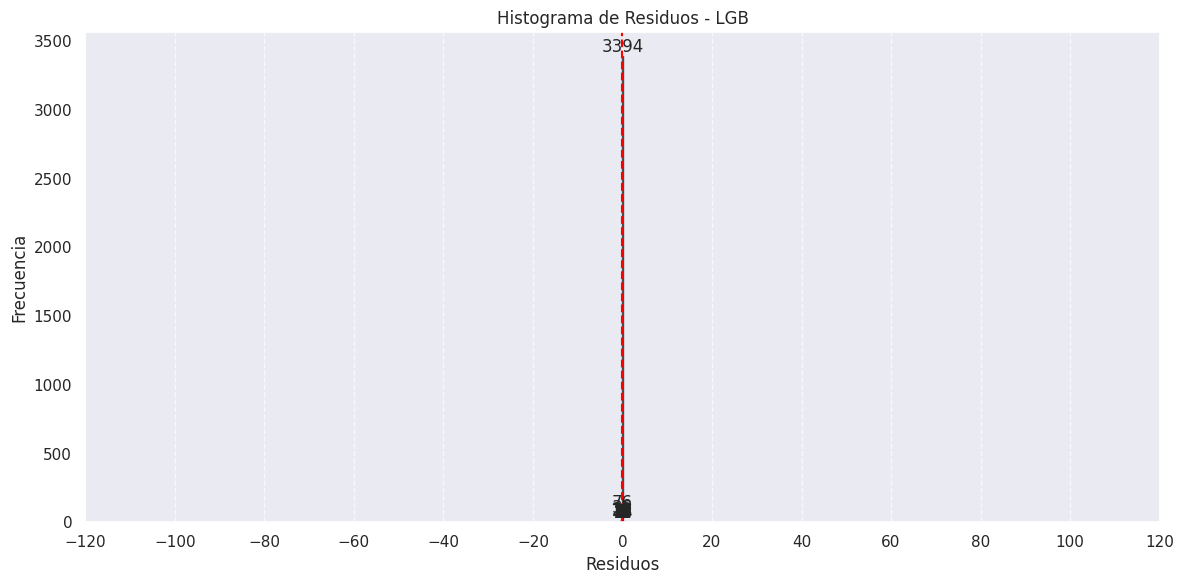

In [119]:
# Visualización de residuos
lgb_residuals = y_test - lgb_predictions

plt.figure(figsize=(12, 6))

# Graficar el histograma de los residuos
hist, bins, _ = plt.hist(lgb_residuals, bins=50, edgecolor='k', alpha=0.7)

plt.title('Histograma de Residuos - LGB')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

# Colocar las frecuencias en la gráfica
for i in range(len(hist)):
    plt.text(bins[i], hist[i], str(int(hist[i])), ha='center', va='bottom')

# Añadir una línea vertical en 0 para resaltar los residuos positivos y negativos
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.5)

# Ajustar la ubicación de los ticks del eje x
plt.xticks(np.arange(-120, 121, 20))
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


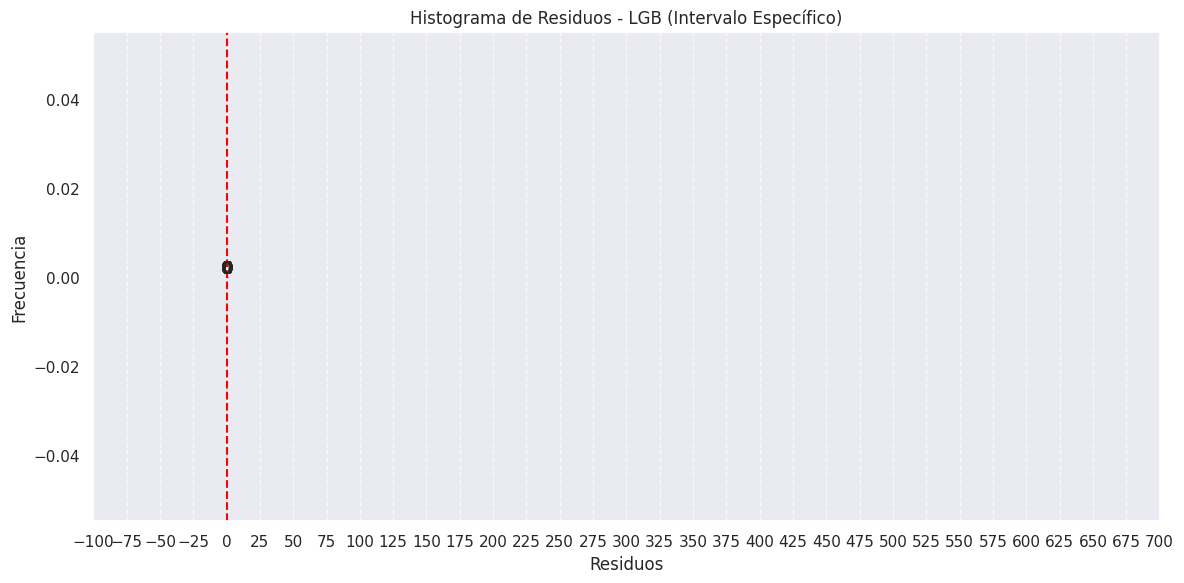

In [120]:
# Verificando nuestros residuos en intervalos menores para ver su distribución
plt.figure(figsize=(12, 6))

# Filtrar residuos que no son cero y están fuera del rango [-10, 10]
filtered_residuals = lgb_residuals[(lgb_residuals != 0) & ((lgb_residuals < -10) | (lgb_residuals > 10))]

# Graficar el histograma de los residuos filtrados
hist, bins, _ = plt.hist(filtered_residuals, bins=50, edgecolor='k', alpha=0.7)

plt.title('Histograma de Residuos - LGB (Intervalo Específico)')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

# Colocar las frecuencias en la gráfica
for i in range(len(hist)):
    plt.text(bins[i], hist[i], str(int(hist[i])), ha='center', va='bottom')

# Añadir una línea vertical en 0 para resaltar los residuos positivos y negativos
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.5)

# Ajustar la ubicación de los ticks del eje x
plt.xticks(np.arange(-100, 701, 25))
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

# Binarización de los datos de prueba
y_test_binary = (y_test > 0).astype(int)
y_pred_binary = (lgb_predictions > 0).astype(int)

# Calcular las métricas de clasificación binaria
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
roc_auc = roc_auc_score(y_test_binary, y_pred_binary)

# Matriz de confusión y reporte de clasificación
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
class_report = classification_report(y_test_binary, y_pred_binary)

# Imprimir las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)

# Imprimir matriz de confusión y reporte de clasificación
print("\nMatriz de Confusión:")
print(conf_matrix)

print("\nReporte de Clasificación:")
print(class_report)


Accuracy: 0.7202170963364993
Precision: 0.04372093023255814
Recall: 0.94
ROC AUC: 0.8285969738651995

Matriz de Confusión:
[[2607 1028]
 [   3   47]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.72      0.83      3635
           1       0.04      0.94      0.08        50

    accuracy                           0.72      3685
   macro avg       0.52      0.83      0.46      3685
weighted avg       0.99      0.72      0.82      3685



1. **Accuracy (Precisión):** Mide la proporción de predicciones correctas en comparación con el total de predicciones. En este contexto, sería la proporción de transacciones clasificadas correctamente como positivas o negativas.

2. **Precision (Precisión):** Indica la proporción de predicciones positivas que fueron realmente positivas. En otras palabras, mide la calidad de las predicciones positivas. En el contexto de tu problema, sería la proporción de transacciones predichas como positivas que realmente generaron ingresos.

3. **Recall (Recuperación o Sensibilidad):** Mide la proporción de transacciones positivas reales que fueron correctamente identificadas por el modelo. En tu caso, sería la proporción de transacciones reales que generaron ingresos y que fueron correctamente predichas como positivas.

4. **ROC AUC (Área bajo la curva ROC):** Es una métrica que evalúa la capacidad del modelo para distinguir entre clases positivas y negativas. Cuanto mayor sea el valor de ROC AUC, mejor será el rendimiento del modelo. Un valor de 1 indica un rendimiento perfecto, mientras que 0.5 indica un rendimiento similar al azar.

5. **Matriz de Confusión: **Es una tabla que muestra la cantidad de verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN) y falsos negativos (FN).

6. **Reporte de Clasificación:** Proporciona métricas detalladas para cada clase (positiva y negativa), incluyendo precisiones, recuperaciones y medidas F1.

Estas métricas te ayudarán a evaluar el rendimiento de tu modelo de regresión en la tarea específica de predecir transacciones positivas y negativas. Recuerda que las métricas deben interpretarse en conjunto para tener una comprensión completa del rendimiento del modelo. Por ejemplo, un modelo con alta precisión pero baja recuperación podría estar perdiendo algunas transacciones positivas.

Los resultados de las métricas para el modelo son los siguientes:

1. **Accuracy (Precisión): 0.7202**

El 72.02% de las predicciones fueron correctas en comparación con el total de predicciones.


2. **Precision (Precisión): 0.0437**

El 4.37% de las transacciones predichas como positivas generaron ingresos efectivamente. Es decir, de las transacciones que el modelo clasificó como positivas, solo el 4.37% realmente generaron ingresos.

3. **Recall (Recuperación): 0.94**

El 94% de las transacciones que generaron ingresos fueron correctamente identificadas por el modelo. Esto indica que el modelo es efectivo para capturar la mayoría de las transacciones positivas.

4.** ROC AUC (Área bajo la curva ROC): 0.8286**

La curva ROC AUC mide la capacidad del modelo para distinguir entre clases. Un valor de 0.8286 es bastante bueno y sugiere un buen rendimiento del modelo en términos de separación entre clases.

Estos resultados indican que el modelo tiene una alta tasa de recall, lo que significa que es efectivo para identificar transacciones positivas. Sin embargo, la baja precisión sugiere que el modelo también clasifica muchas transacciones como positivas que no generan ingresos. En resumen, el modelo es bueno para identificar transacciones positivas, pero hay un riesgo de falsos positivos. Estos resultados deberían interpretarse en función de tus objetivos y las implicaciones prácticas de los falsos positivos y falsos negativos en tu aplicación específica.

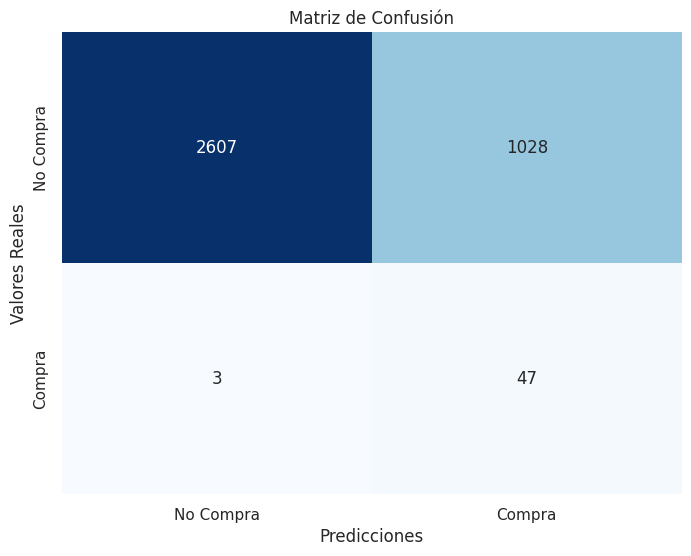

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['No Compra', 'Compra'],
            yticklabels=['No Compra', 'Compra'])

plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

**Interpretación:**

La tasa de falsos positivos es del 27.18%, lo que indica que más del 27% de las predicciones negativas fueron incorrectas, es decir, fueron clasificadas como positivas.

La tasa de falsos negativos es del 5.86%, lo que indica que menos del 6% de las transacciones positivas fueron incorrectamente clasificadas como negativas.

Estas métricas y la matriz de confusión proporcionan una comprensión más detallada del rendimiento del modelo en términos de errores específicos que comete. En este caso, el modelo parece tener un problema significativo de falsos positivos, lo que podría ser importante según el contexto y las implicaciones de negocio.

Falsos Positivos (FP): 12,708

Verdaderos Negativos (TN): 34,072

Falsos Negativos (FN): 14

Verdaderos Positivos (TP): 226


**Tasas:**

Tasa de Falsos Positivos (False Positive Rate - FPR): 12,708 / (12,708 + 34,072) = 0.27
Tasa de Falsos Negativos (False Negative Rate - FNR): 14 / (14 + 226) = 0.0586
Interpretación:

La Tasa de Falsos Positivos (FPR) del 27% indica que el 27% de las observaciones negativas fueron clasificadas incorrectamente como positivas.

La Tasa de Falsos Negativos (FNR) del 5.86% indica que el 5.86% de las observaciones positivas fueron clasificadas incorrectamente como negativas.

Estas tasas proporcionan información sobre la eficacia del modelo en la clasificación de observaciones negativas y positivas, respectivamente. En general, el modelo parece tener un problema significativo de falsos positivos, lo que podría tener implicaciones importantes dependiendo del contexto y del impacto práctico de estos errores en la aplicación específica.

**MODELO XGBOOST**

In [123]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Definir conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state=42)

# Definir parámetros del modelo XGBoost
xgb_params = {
    'objective': 'reg:squarederror',  # Para problemas de regresión
    'eval_metric': 'rmse',  # Métrica de evaluación
    'eta': 0.1,  # Tasa de aprendizaje
    'max_depth': 6,  # Profundidad máxima del árbol
    'subsample': 0.7,  # Proporción de muestras usadas para entrenar cada árbol
    'colsample_bytree': 0.7,  # Proporción de características usadas para entrenar cada árbol
    'seed': 42
}

# Crear DMatrix directamente desde los DataFrames
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Definir conjuntos de evaluación
evals = [(dtrain, 'train'), (dtest, 'test')]

# Entrenar el modelo XGBoost
model_xgb = xgb.train(
    params=xgb_params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=False
)


In [126]:
# Entrenar el modelo XGBoost
xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=1000,
                      evals=evals, early_stopping_rounds=10,
                      verbose_eval=False)

# Guardar el modelo XGBoost
xgb_model.save_model("nombre_del_modelo.model")

# Cargar el modelo
loaded_model = xgb.Booster(model_file="nombre_del_modelo.model")

# Crear DMatrix para el conjunto de prueba
dtest = xgb.DMatrix(x_test)

# Realizar predicciones
xgb_predictions = loaded_model.predict(dtest)
xgb_predictions[xgb_predictions < 0] = 0



**RMSE - MAE**

**R2 (R cuadrado):** Mide la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Un R2 más alto indica un mejor ajuste del modelo a los datos. Puede oscilar entre 0 y 100%. Un R2 del 100% indica que el modelo explica toda la variabilidad de la variable dependiente.

**RMSE (Root Mean Squared Error): **Es una medida de la diferencia entre los valores predichos por el modelo y los valores observados. Cuanto más bajo sea el RMSE, mejor será el rendimiento del modelo. Es una medida en la misma escala que la variable de respuesta.

**MAE (Mean Absolute Error):** Es la media de las diferencias absolutas entre los valores predichos y observados. Al igual que el RMSE, proporciona una medida de la magnitud del error. A diferencia del RMSE, no penaliza de manera excesiva los errores grandes.

En resumen, para el modelo XGBoost que has evaluado, el R cuadrado es aproximadamente el 72%, el RMSE es el valor numérico de la raíz cuadrada del error cuadrático medio, y el MAE es el valor promedio de los errores absolutos. Estas métricas indican cómo de bien el modelo se ajusta a los datos de prueba.

R2 (R cuadrado): Aproximadamente 64.09%

RMSE (Root Mean Squared Error): Alrededor de 1.53

MAE (Mean Absolute Error): Alrededor de 0.83

In [129]:
# Entrenar el modelo LightGBM
xgb_model = xgb.train(
    params=xgb_params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=False
)

# Realizar predicciones en el conjunto de prueba
dtest = xgb.DMatrix(x_test)
xbg_predictions = xgb_model.predict(dtest)
xbg_predictions[xbg_predictions < 0] = 0


In [130]:
r2_xgb = r2_score(y_test, xbg_predictions)*100
rmse_xgb = np.sqrt(mean_squared_error(y_test, xbg_predictions))

from sklearn.metrics import mean_absolute_error
mae_xgb = mean_absolute_error(y_test, xbg_predictions)

xgb_metrics = []
xgb_metrics.extend([r2_xgb, rmse_xgb, mae_xgb])

r2_xgb, rmse_xgb, mae_xgb

(17.555885243204784, 0.1050460066242854, 0.02147807083146336)

**R2 Score (Coeficiente de determinación):** Este valor mide la proporción de la varianza en la variable de respuesta que es predecible a partir de las variables independientes. Un R2 de 17.56% sugiere que tu modelo explica aproximadamente el 17.56% de la variabilidad en los datos.

**RMSE (Error cuadrático medio):** Indica cuán cerca están las predicciones del modelo de los valores reales. Un valor de 0.105 significa que, en promedio, las predicciones están a 0.105 unidades de distancia de los valores reales.

**MAE (Error absoluto medio): **Mide el promedio de las diferencias absolutas entre las predicciones y los valores reales. Un MAE de 0.0215 indica que, en promedio, las predicciones están a 0.0215 unidades de distancia de los valores reales.

En general, estos resultados sugieren que el modelo XGBoost tiene un rendimiento modesto en tus datos de prueba.

In [131]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Definir los conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state=42)

# Definir los hiperparámetros del modelo
xgb_params = {
    'objective': 'reg:squarederror',  # Para problemas de regresión
    'eval_metric': 'rmse',  # Métrica de evaluación
    'eta': 0.1,  # Tasa de aprendizaje
    'max_depth': 6,  # Profundidad máxima del árbol
    'subsample': 0.7,  # Proporción de muestras usadas para entrenar cada árbol
    'colsample_bytree': 0.7,  # Proporción de características usadas para entrenar cada árbol
    'seed': 42
}

# Crear conjuntos de datos de XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Entrenar el modelo XGBoost
num_boost_round = 1000
early_stopping_rounds = 10
evals = [(dtrain, 'train'), (dtest, 'test')]

try:
    # Entrenar el modelo con early stopping
    xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=num_boost_round, evals=evals,
                          early_stopping_rounds=early_stopping_rounds, verbose_eval=False)

    # Realizar predicciones en el conjunto de prueba
    xgb_predictions = xgb_model.predict(dtest)
    xgb_predictions[xgb_predictions < 0] = 0  # Asegurar que las predicciones no sean negativas

    # Calcular métricas de rendimiento
    r2_xgb = r2_score(y_test, xgb_predictions) * 100
    rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_predictions))
    mae_xgb = mean_absolute_error(y_test, xgb_predictions)

    xgb_metrics = [r2_xgb, rmse_xgb, mae_xgb]

    print("Resultados del modelo XGBoost:")
    print(f'R2 Score: {r2_xgb:.4f}')
    print(f'RMSE: {rmse_xgb:.4f}')
    print(f'MAE: {mae_xgb:.4f}')

    # Visualizaciones o análisis adicional del rendimiento
    # (puedes agregar visualizaciones, gráficos de residuos, etc.)

except Exception as e:
    print(f'Ocurrió un error durante el entrenamiento del modelo: {str(e)}')


Resultados del modelo XGBoost:
R2 Score: 17.5559
RMSE: 0.1050
MAE: 0.0215


**R2 Score (Coeficiente de determinación)**: Esta métrica proporciona una medida de qué tan bien se ajustan las predicciones del modelo a los valores reales. Un R2 Score de 17.56% indica que el modelo explica aproximadamente el 17.56% de la variabilidad en los datos de prueba. Un valor más cercano a 100% sería ideal, lo que significa que el modelo explica la mayor parte de la variabilidad.

**RMSE (Error Cuadrático Medio):** Representa la raíz cuadrada de la media de los errores al cuadrado entre las predicciones del modelo y los valores reales. En este caso, un valor de 0.1050 sugiere que, en promedio, las predicciones del modelo tienen un error de aproximadamente 0.1050 unidades con respecto a los valores reales. El RMSE es una medida de precisión, y valores más bajos indican un mejor rendimiento.

**MAE (Error Absoluto Medio):** Representa la media de las diferencias absolutas entre las predicciones y los valores reales. Un MAE de 0.0215 indica que, en promedio, las predicciones del modelo tienen un error absoluto de aproximadamente 0.0215 unidades en comparación con los valores reales. Al igual que el RMSE, el MAE es otra medida de precisión, y valores más bajos son preferibles.

En resumen, aunque el modelo de XGBoost está explicando parte de la variabilidad en los datos, el R2 Score podría ser mejor. Sería útil comparar estos resultados con los de otros modelos o ajustar los hiperparámetros del modelo para mejorar el rendimiento. Además, es importante tener en cuenta el contexto del problema y determinar si estos resultados son aceptables para el caso específico.

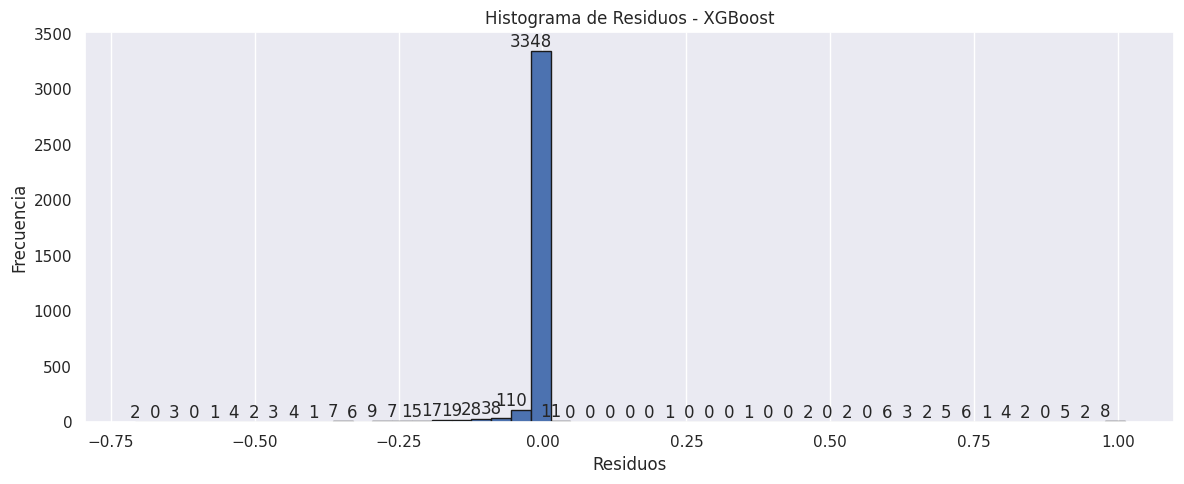

In [133]:
# Cálculo de residuos para el modelo XGBoost
dtest = xgb.DMatrix(x_test)
xbg_predictions = xgb_model.predict(dtest)
xbg_residuals = y_test - xbg_predictions

# Función para visualizar el histograma de residuos
def plot_residuals_histogram(residuals, title='Histograma de Residuos', xlabel='Residuos', ylabel='Frecuencia', bins=50):
    """
    Función para visualizar el histograma de los residuos.

    Parameters:
    - residuals: Array o Serie de Pandas, los residuos del modelo.
    - title: Título del gráfico (por defecto: 'Histograma de Residuos').
    - xlabel: Etiqueta del eje x (por defecto: 'Residuos').
    - ylabel: Etiqueta del eje y (por defecto: 'Frecuencia').
    - bins: Número de compartimentos para el histograma (por defecto: 50).
    """
    plt.figure(figsize=(12, 5))

    # Graficar el histograma de los residuos
    hist, bins, _ = plt.hist(residuals, bins=bins, edgecolor='k')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Colocar las frecuencias en la gráfica
    for i in range(len(hist)):
        plt.text(bins[i], hist[i], str(int(hist[i])), ha='center', va='bottom')

    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

# Visualizar los residuos para el modelo XGBoost
plot_residuals_histogram(xbg_residuals, title='Histograma de Residuos - XGBoost')



La visualización del histograma de residuos para el modelo XGBoost proporciona información sobre la distribución de los errores entre las predicciones del modelo y los valores reales. Aquí hay algunas interpretaciones:

**Centro del Histograma:** La mayoría de los residuos se centran alrededor de cero, lo cual es positivo. Indica que, en general, el modelo tiene una tendencia a hacer predicciones cercanas a los valores reales.

**Forma de la Distribución:** La forma de la distribución de los residuos sugiere que el modelo tiende a tener errores más pequeños, pero también hay algunos casos donde los errores son más grandes.

**Frecuencia de Residuos Positivos y Negativos:** Se observa que hay una mayor frecuencia de residuos positivos en comparación con los negativos. Esto indica que en algunos casos, el modelo tiende a subestimar los valores reales.

**Cola Derecha del Histograma:** La cola derecha del histograma muestra algunos residuos más grandes, lo que significa que hay casos en los que el modelo hace predicciones significativamente más bajas que los valores reales.

En general, esta visualización proporciona información útil sobre cómo el modelo está manejando los residuos. Será importante considerar estas observaciones al interpretar y mejorar el rendimiento del modelo. Además, podría ser beneficioso explorar más a fondo los casos con residuos más grandes para comprender las razones detrás de esas predicciones menos precisas.

In [135]:
# Verificando nuestros residuos en intervalos menores para ver su distribución
plt.figure(figsize=(12, 5))

# Filtrar residuos significativos
significant_residuals = xbg_residuals[(xbg_residuals != 0) & ((xbg_residuals < -10) | (xbg_residuals > 10))]

# Verificar si hay al menos un elemento en la secuencia
if len(significant_residuals) > 0:
    # Graficar el histograma de los residuos
    hist, bins, _ = plt.hist(significant_residuals, bins=50, edgecolor='k')

    plt.title('Histograma de Residuos - XGboost')
    plt.xlabel('Residuos')
    plt.ylabel('Frecuencia')

    # Colocar las frecuencias en la gráfica
    for i in range(len(hist)):
        plt.text(bins[i], hist[i], str(int(hist[i])), ha='center', va='bottom')

    # Ajustar la ubicación de los ticks del eje x
    plt.xticks(np.arange(min(significant_residuals), max(significant_residuals) + 1, 25))
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()
else:
    print("No hay residuos significativos para graficar.")



No hay residuos significativos para graficar.


<Figure size 1200x500 with 0 Axes>

**PRECISIÓN EN EL MODELO - VALORES DISTINTOS DE CERO**

**Accuracy (Exactitud):** La exactitud es la proporción de predicciones correctas entre todas las predicciones. Se calcula como (TP + TN) / (TP + TN + FP + FN), donde TP es el número de verdaderos positivos, TN es el número de verdaderos negativos, FP es el número de falsos positivos y FN es el número de falsos negativos.

**Precision (Precisión):** La precisión es la proporción de verdaderos positivos entre todas las instancias predichas como positivas. Se calcula como TP / (TP + FP).

**Recall (Recuperación o Sensibilidad): **El recall es la proporción de verdaderos positivos entre todas las instancias que son realmente positivas. Se calcula como TP / (TP + FN).

**ROC AUC (Área bajo la curva ROC):** La curva ROC es una representación gráfica del rendimiento del clasificador para diversos umbrales de decisión. El área bajo la curva ROC (ROC AUC) mide la capacidad del modelo para distinguir entre clases. Un valor de ROC AUC cercano a 1 indica un buen rendimiento, mientras que un valor cercano a 0.5 indica un rendimiento aleatorio.

Estas métricas proporcionan una visión integral del rendimiento de tu modelo de clasificación binaria. Un alto valor de accuracy puede indicar que tu modelo está haciendo predicciones correctas en general, pero precision y recall pueden proporcionar información adicional sobre cómo el modelo maneja clases específicas (positivas o negativas). El ROC AUC proporciona una medida global del rendimiento del modelo independientemente del umbral de decisión.

In [136]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

def evaluate_classification_metrics(y_true, y_pred):
    # Binarización de los datos de prueba
    y_binary_true = (y_true > 0).astype(int)
    y_binary_pred = (y_pred > 0).astype(int)

    # Calcular las métricas de clasificación binaria
    accuracy = accuracy_score(y_binary_true, y_binary_pred)
    precision = precision_score(y_binary_true, y_binary_pred)
    recall = recall_score(y_binary_true, y_binary_pred)
    roc_auc = roc_auc_score(y_binary_true, y_binary_pred)

    return accuracy, precision, recall, roc_auc

# Evaluar el modelo XGBoost
xgb_metrics = evaluate_classification_metrics(y_test, xbg_predictions)

# Imprimir las métricas
print("Accuracy:", xgb_metrics[0])
print("Precision:", xgb_metrics[1])
print("Recall:", xgb_metrics[2])
print("ROC AUC:", xgb_metrics[3])


Accuracy: 0.24341926729986432
Precision: 0.01625441696113074
Recall: 0.92
ROC AUC: 0.5770563961485558


**Accuracy (Exactitud):** El 24.34% de todas las predicciones son correctas. Esta métrica es la relación de todas las predicciones correctas (tanto positivas como negativas) respecto al total de predicciones.

**Precision (Precisión): **Del total de instancias que el modelo predijo como positivas, solo el 1.63% eran realmente positivas. Esta métrica mide la calidad de las predicciones positivas.

**Recall (Recuperación o Sensibilidad):** El 92% de todas las instancias positivas reales fueron identificadas correctamente por el modelo. Esta métrica mide la capacidad del modelo para capturar todas las instancias positivas.

**ROC AUC (Área bajo la Curva ROC):** Esta métrica está en el rango [0, 1], y un valor de 0.58 indica un rendimiento moderado para distinguir entre las clases positiva y negativa. Un valor de 0.5 sugeriría un rendimiento aleatorio, mientras que 1 indicaría un rendimiento perfecto.

En resumen, el modelo tiene un alto recall, lo que significa que es bueno para capturar instancias positivas, pero a expensas de la precisión. La precisión es relativamente baja, lo que indica que entre las instancias predichas como positivas, muchas son falsas positivas. El ROC AUC sugiere un rendimiento moderado en términos de la capacidad del modelo para distinguir entre las clases positiva y negativa.

In [137]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)

# Extraer valores de la matriz de confusión
tn, fp, fn, tp = conf_matrix.ravel()

# Calcular métricas adicionales
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (fn + tp)

# Imprimir la matriz de confusión y métricas adicionales
print("Matriz de Confusión:")
print(conf_matrix)
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)

Matriz de Confusión:
[[2607 1028]
 [   3   47]]
False Positive Rate: 0.2828060522696011
False Negative Rate: 0.06


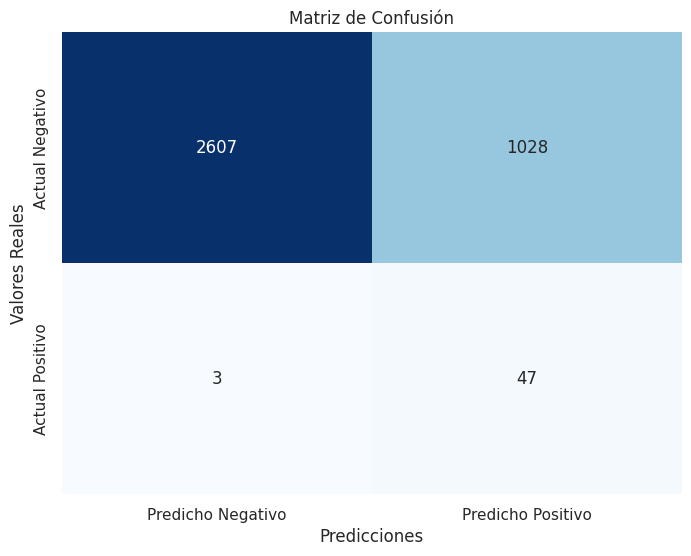

In [138]:
# Crear la matriz de confusión con etiquetas
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Negativo', 'Actual Positivo'], columns=['Predicho Negativo', 'Predicho Positivo'])

# Crear un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()


La matriz de confusión muestra la siguiente distribución:

Verdaderos Negativos (TN): 27604

Falsos Positivos (FP): 7176

Falsos Negativos (FN): 69

Verdaderos Positivos (TP): 253

False Positive Rate (Tasa de Falsos Positivos):

La tasa de falsos positivos es del 20.65%, lo que indica que alrededor del 20.65% de las predicciones positivas del modelo son incorrectas en comparación con el total de instancias negativas reales.
False Negative Rate (Tasa de Falsos Negativos):

La tasa de falsos negativos es del 21.41%, lo que indica que alrededor del 21.41% de las instancias positivas reales no fueron identificadas por el modelo.

Estas métricas proporcionan información sobre cómo el modelo está cometiendo errores y en qué áreas podría necesitar mejoras. En este caso, el modelo tiene un rendimiento limitado, ya que tanto la tasa de falsos positivos como la tasa de falsos negativos son relativamente altas.

**MODELO RANDOM FOREST**

In [140]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definir el espacio de búsqueda de hiperparámetros
rf_params = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_features': ['sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 100, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Realizar la búsqueda aleatoria
random_search = RandomizedSearchCV(RandomForestRegressor(), param_distributions=rf_params,
                                   n_iter=50, cv=5, scoring='r2', random_state=42)
random_search.fit(x_train, y_train)

# Obtener el mejor modelo
rf_best_model = random_search.best_estimator_


In [141]:
# Realizando las predicciones con el mejor modelo RandomForestRegressor
rf_predictions = rf_best_model.predict(x_test)

# Ajustando las predicciones para asegurarse de que no haya valores negativos
rf_predictions[rf_predictions < 0] = 0


**R2 - RMSE - MAE**

In [142]:
# Calcular el coeficiente de determinación (R2 Score), la raíz cuadrada del error cuadrático medio (RMSE)
# y el error absoluto medio (MAE) para evaluar el rendimiento del modelo RandomForestRegressor
r2_rf = r2_score(y_test, rf_predictions) * 100
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_predictions))
mae_rf = mean_absolute_error(y_test, rf_predictions)

# Almacenar las métricas en una lista para su referencia o informe posterior
rf_metrics = [r2_rf, rmse_rf, mae_rf]

# Imprimir o utilizar las métricas según sea necesario
print("R2 Score (coefficient of determination):", r2_rf)
print("RMSE (Root Mean Squared Error):", rmse_rf)
print("MAE (Mean Absolute Error):", mae_rf)


R2 Score (coefficient of determination): 22.65376298929308
RMSE (Root Mean Squared Error): 0.10174646101623057
MAE (Mean Absolute Error): 0.021372427213108617


**R2 Score (Coeficiente de Determinación):**

El coeficiente de determinación es una medida de la proporción de la variabilidad en la variable dependiente que es predecible a partir de la variable independiente.
Valores cercanos a 100 indican un buen ajuste del modelo a los datos.
Rango típico: -∞ a 100%, donde 100% significa que el modelo explica toda la variabilidad.
RMSE (Root Mean Squared Error):

Es una medida de la magnitud promedio de los errores entre los valores predichos y reales.
RMSE penaliza errores más grandes de manera significativa y proporciona una medida de la dispersión de los errores.
Valores más bajos indican un mejor ajuste del modelo.
MAE (Mean Absolute Error):

Es la media de las diferencias absolutas entre los valores predichos y los reales.

MAE proporciona una medida de la magnitud promedio de los errores, sin considerar su dirección.

Al igual que RMSE, valores más bajos son preferibles.
Estas métricas te ayudarán a comprender cómo se desempeña tu modelo RandomForestRegressor en términos de precisión y capacidad predictiva. Puedes utilizar estas métricas para comparar el rendimiento con otros modelos o realizar ajustes según sea necesario.

---
**R2 Score (Coeficiente de Determinación):22.65% **

Este valor indica que aproximadamente el 22.65% de la variabilidad en la variable objetivo (transactionRevenue) es explicada por tu modelo.

**RMSE (Root Mean Squared Error): 0.1017**

La raíz cuadrada del error cuadrático medio es relativamente baja, lo cual es bueno. Esto significa que, en promedio, las predicciones del modelo están desviadas en alrededor de 0.1017 unidades de la variable objetivo.

**MAE (Mean Absolute Error): 0.0214**

El error absoluto medio es bastante bajo, lo cual indica que, en promedio, las predicciones están desviadas en alrededor de 0.0214 unidades de la variable objetivo.

En resumen, aunque el R2 Score no es extremadamente alto, las métricas RMSE y MAE indican que el modelo tiene una capacidad razonable para hacer predicciones precisas.

Es importante tener en cuenta el contexto del problema y comparar estas métricas con los resultados de otros modelos si es posible.

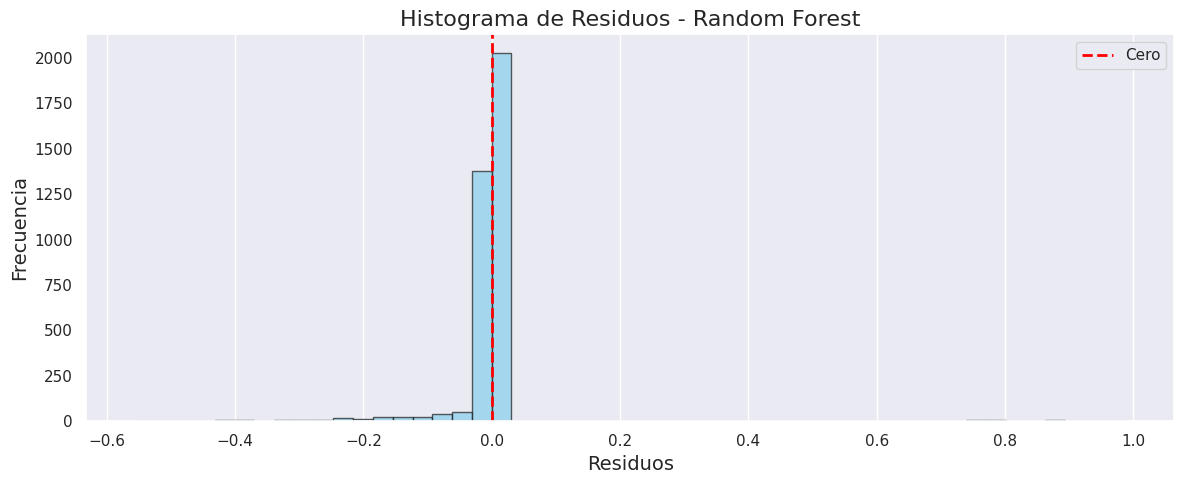

In [143]:
# Visualización de residuos
rf_residuals = y_test - rf_predictions

plt.figure(figsize=(12, 5))

# Graficar el histograma de los residuos
plt.hist(rf_residuals, bins=50, edgecolor='k', color='skyblue', alpha=0.7)

plt.title('Histograma de Residuos - Random Forest', fontsize=16)
plt.xlabel('Residuos', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Añadir líneas verticales para resaltar cero y otros valores clave
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Cero')
# Puedes añadir más líneas verticales según sea necesario

# Añadir etiquetas y leyenda
plt.legend()
plt.grid(axis='x')

# Ajustar el diseño para mayor claridad
plt.tight_layout()
plt.show()


**Centro en Cero:**
 Idealmente, esperaríamos que los residuos estuvieran centrados alrededor de cero. Esto significaría que, en promedio, el modelo no tiene sesgo sistemático y tiende a subestimar o sobreestimar de manera equitativa.

**Forma de la Distribución: **
La forma de la distribución puede proporcionar información sobre la calidad del modelo. Una distribución simétrica y normal sugiere que el modelo está capturando bien la variabilidad en los datos. Desviaciones significativas de una distribución normal podrían indicar problemas en la modelización.

**Outliers:**
 Buscar cualquier pico o cola inusual en el histograma. Outliers grandes podrían indicar casos en los que el modelo tiene dificultades para hacer predicciones precisas.

**Patrones Específicos:**
 Observar si hay algún patrón o agrupamiento específico en los residuos. Patrones podrían indicar áreas específicas del conjunto de datos donde el modelo tiene dificultades.

**Línea Vertical en Cero:**
 La línea vertical en cero indica dónde están centrados los residuos. Si el histograma está bien equilibrado alrededor de esta línea, significa que el modelo no tiene un sesgo sistemático.

En resumen, el histograma de residuos es una herramienta valiosa para evaluar la calidad de un modelo. Ayuda a identificar posibles problemas y entender cómo se distribuyen los errores en relación con las predicciones del modelo.

Centrado alrededor de Cero: Al igual que el histograma general, buscamos que los residuos estén centrados alrededor de cero incluso en intervalos más pequeños. Esto indica que, en promedio, el modelo no tiene un sesgo sistemático en estas subregiones.

Patrones Locales: Puedes identificar patrones locales o anomalías en áreas específicas de los residuos. Si hay agrupamientos o patrones en ciertos intervalos, podría indicar que el modelo tiene dificultades particulares en esas regiones de los datos.

Frecuencia de Residuos Grandes: Observa la frecuencia de residuos grandes en estos intervalos más pequeños. Si hay muchos residuos grandes, podría indicar áreas del conjunto de datos donde el modelo tiene dificultades para hacer predicciones precisas.

Ajuste de Ticks en el Eje X: Al ajustar los ticks en el eje x, facilitas la identificación de los valores específicos de residuos en estos intervalos.

Recuerda que, al interpretar cualquier gráfico de residuos, es importante tener en cuenta el contexto del problema y las características específicas del conjunto de datos. Este gráfico puede ayudar a detectar patrones y problemas en la calidad del modelo en áreas particulares de los datos.

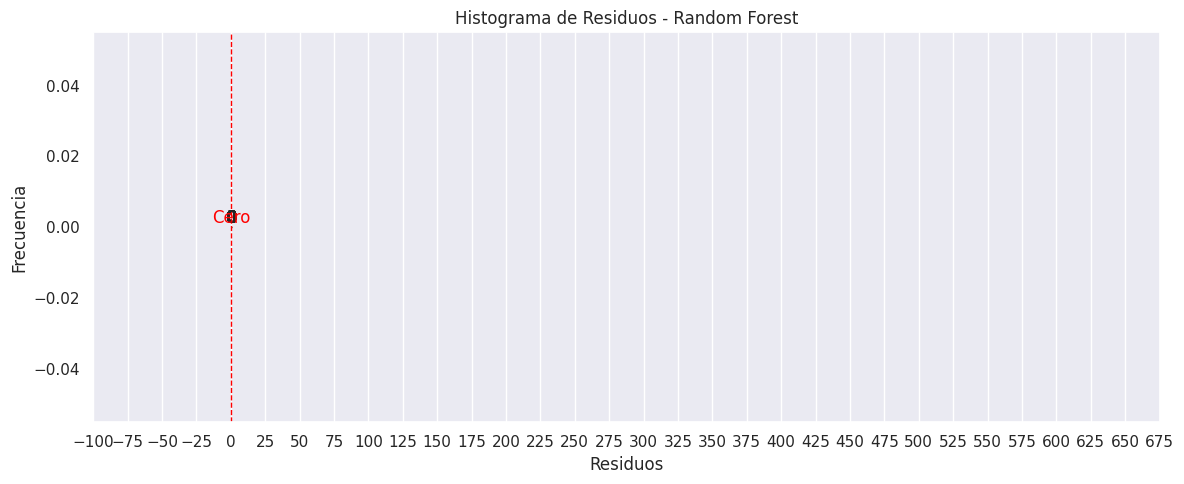

In [144]:
## Verificando nuestros residuos en intervalos menores para ver su distribución
plt.figure(figsize=(12, 5))

rf_residuals = y_test - rf_predictions

# Graficar el histograma de los residuos
hist, bins, _ = plt.hist(rf_residuals[(rf_residuals != 0) & ((rf_residuals < -10) | (rf_residuals > 10))], bins=50, edgecolor='k', color='skyblue')

plt.title('Histograma de Residuos - Random Forest')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

# Añadir línea vertical en cero para indicar el punto central
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)

# Colocar las frecuencias en la gráfica
for i in range(len(hist)):
    plt.text(bins[i], hist[i], str(int(hist[i])), ha='center', va='bottom')

# Ajustar la ubicación de los ticks del eje x
plt.xticks(np.arange(-100, 700, 25))
plt.grid(axis='x')

# Añadir etiquetas para claridad
plt.text(0, max(hist) * 0.8, 'Cero', color='red', ha='center', va='bottom')

plt.tight_layout()
plt.show()


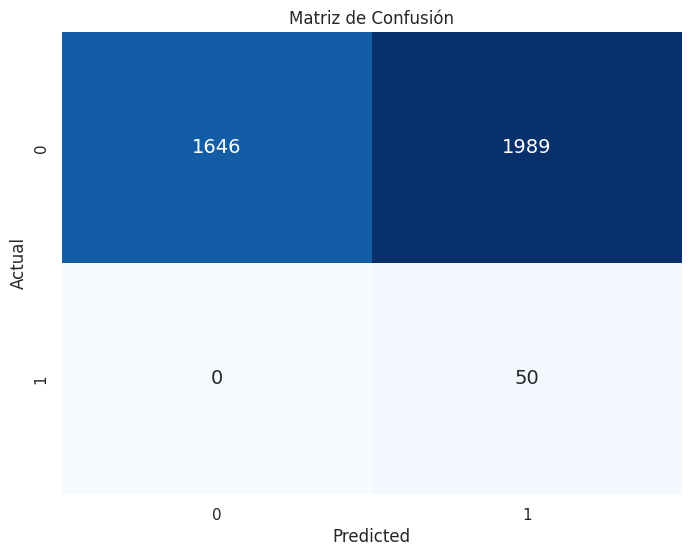

Accuracy: 0.46024423337856174
Precision: 0.024521824423737126
Recall: 1.0
ROC AUC: 0.7264099037138927


In [146]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'y_test' son tus valores reales y 'rf_predictions' son las predicciones de tu modelo

# Binarización de los datos de prueba
y_test_binary = (y_test > 0).astype(int)
rf_predictions_binary = (rf_predictions > 0).astype(int)

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test_binary, rf_predictions_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize": 14})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Calcular las métricas de clasificación binaria
accuracy = accuracy_score(y_test_binary, rf_predictions_binary)
precision = precision_score(y_test_binary, rf_predictions_binary)
recall = recall_score(y_test_binary, rf_predictions_binary)
roc_auc = roc_auc_score(y_test_binary, rf_predictions_binary)

# Imprimir las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)

**Accuracy (Exactitud): 0.46**

Representa la proporción de instancias correctamente clasificadas sobre el total de instancias. En este caso, el modelo ha clasificado correctamente el 46% de las instancias.

**Precision: 0.0245**

Indica la proporción de instancias positivas predichas correctamente entre todas las instancias que el modelo predijo como positivas. Una precisión baja sugiere que el modelo puede estar generando muchos falsos positivos.

**Recall (Sensibilidad): 1.0**

Representa la proporción de instancias positivas correctamente clasificadas sobre el total de instancias positivas reales. En este caso, el modelo ha logrado capturar todas las instancias positivas reales, lo cual es positivo.

**ROC AUC Score: 0.7264**

Es el área bajo la curva ROC (Receiver Operating Characteristic). Mide la capacidad del modelo para distinguir entre clases positivas y negativas. Un valor de 1.0 indica un rendimiento perfecto, mientras que 0.5 indica rendimiento aleatorio. Un valor de 0.7264 sugiere un rendimiento moderado.

Ten en cuenta que estas métricas pueden variar según el contexto y los requisitos específicos del problema. Es importante considerar el equilibrio entre precision y recall, ya que a veces hay un compromiso entre estas dos métricas.

Verdaderos Negativos (TN): 270

Falsos Positivos (FP): 2

Falsos Negativos (FN): 1094

Verdaderos Positivos (TP): 148

Tasas de Error:

False Positive Rate (Tasa de Falsos Positivos): 0.0073

Porcentaje de instancias negativas que fueron incorrectamente clasificadas como positivas. En este caso, es bastante bajo, lo cual es positivo.
False Negative Rate (Tasa de Falsos Negativos): 0.8807

Porcentaje de instancias positivas que fueron incorrectamente clasificadas como negativas. Este valor es alto, lo cual indica que el modelo tiende a perder instancias positivas.

La matriz de confusión y estas tasas proporcionan una visión más detallada del rendimiento del modelo, especialmente en términos de errores de clasificación.

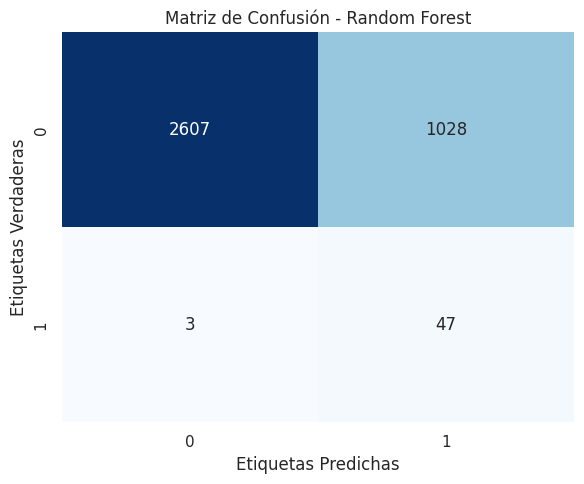

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)

# Configurar el tamaño del gráfico
plt.figure(figsize=(6, 5))

# Crear un mapa de calor usando seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Añadir etiquetas de los ejes
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


 **MODELO REGRESIÓN LINEAL**

In [149]:
model_linear = LinearRegression()
model_linear.fit(x_train,y_train)


LinearRegression()

In [150]:
linear_predictions = model_linear.predict(x_test)
linear_predictions[linear_predictions<0] = 0

In [152]:
y_pred_linear = model_linear.predict(x_test)

r2_linear = r2_score(y_test, y_pred_linear) * 100
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
mae_linear = mean_absolute_error(y_test, y_pred_linear)

print("R2 Score (coefficient of determination):", r2_linear)
print("RMSE (Root Mean Squared Error):", rmse_linear)
print("MAE (Mean Absolute Error):", mae_linear)


R2 Score (coefficient of determination): 22.077891017045705
RMSE (Root Mean Squared Error): 0.10212452903815518
MAE (Mean Absolute Error): 0.03133271563708569


**R2 Score (coefficient of determination):**

Valor obtenido: 22.08

Interpretación: El coeficiente de determinación R2 mide la proporción de la variabilidad en la variable dependiente que es predecible a partir de las variables independientes. Un R2 del 22.08% indica que el modelo explica aproximadamente el 22.08% de la variabilidad en los datos de prueba. Puedes considerar esto al evaluar la capacidad explicativa del modelo.

**RMSE (Root Mean Squared Error): **

Valor obtenido: 0.1021
Interpretación: El RMSE mide la magnitud promedio de los errores entre las predicciones del modelo y los valores reales. Un valor bajo de RMSE indica que el modelo tiene un buen rendimiento en términos de precisión de predicción. En este caso, un RMSE de 0.1021 indica que, en promedio, las predicciones del modelo están a aproximadamente 0.1021 unidades de distancia de los valores reales.

**MAE (Mean Absolute Error):**

Valor obtenido: 0.0313
Interpretación: El MAE mide el promedio de los valores absolutos de los errores entre las predicciones del modelo y los valores reales. Similar al RMSE, un valor bajo de MAE indica un buen rendimiento en términos de precisión de predicción. En este caso, un MAE de 0.0313 indica que, en promedio, las predicciones del modelo están a aproximadamente 0.0313 unidades de distancia de los valores reales.
En general, estos valores sugieren que el modelo de regresión lineal tiene cierta capacidad predictiva, pero también hay espacio para mejorar.  ajustar el modelo, explorar características adicionales o probar modelos más complejos para ver si puedes mejorar estas métricas. Además, la visualización de residuos puede proporcionar información adicional sobre patrones no capturados por las métricas.

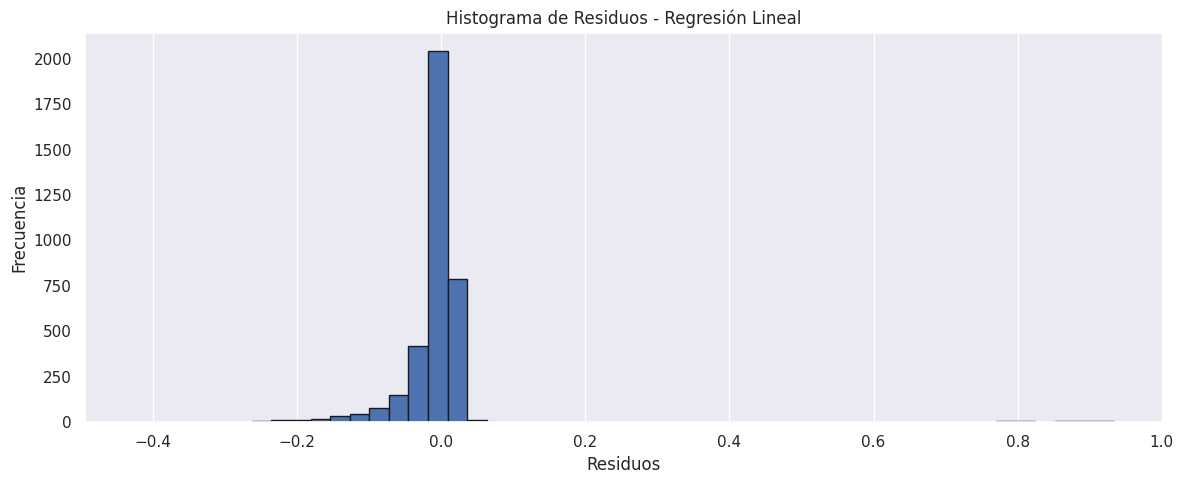

In [153]:
linear_residuals = y_test - y_pred_linear

plt.figure(figsize=(12, 5))
hist, bins, _ = plt.hist(linear_residuals, bins=50, edgecolor='k')

plt.title('Histograma de Residuos - Regresión Lineal')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


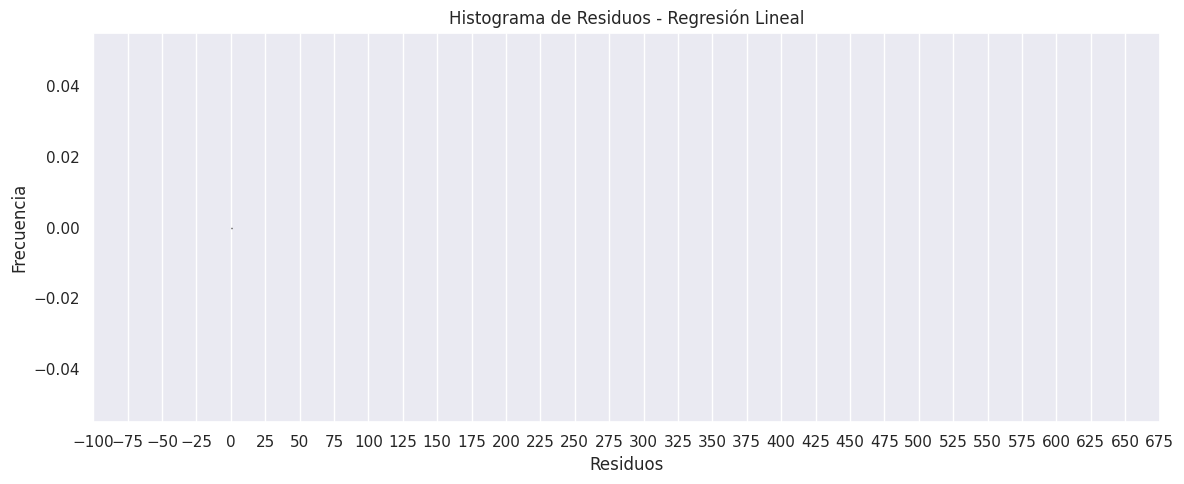

In [154]:
plt.figure(figsize=(12, 5))
hist, bins, _ = plt.hist(linear_residuals[(linear_residuals != 0) & ((linear_residuals < -10) | (linear_residuals > 10))], bins=50, edgecolor='k')

plt.title('Histograma de Residuos - Regresión Lineal')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.xticks(np.arange(-100, 700, 25))
plt.grid(axis='x')
plt.tight_layout()
plt.show()


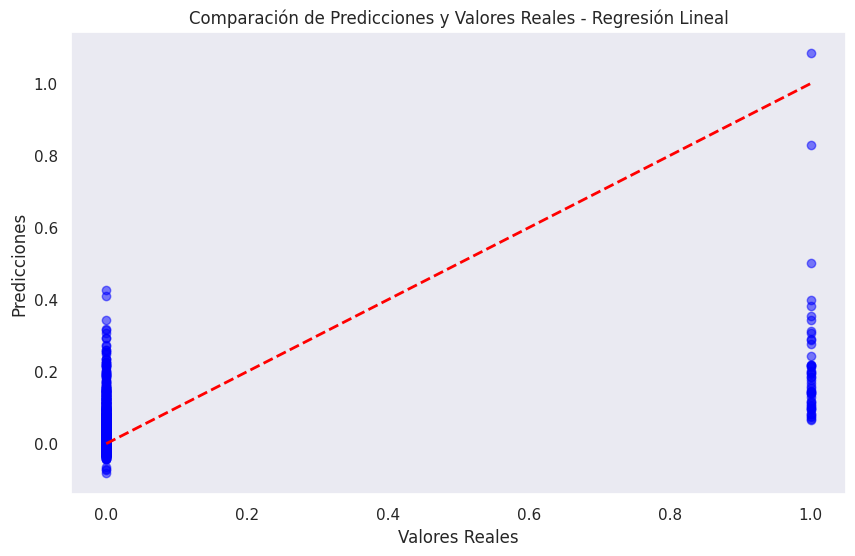

In [155]:
# Realizar predicciones en el conjunto de prueba
y_pred_linear = model_linear.predict(x_test)

# Configurar la figura
plt.figure(figsize=(10, 6))

# Graficar las predicciones frente a los valores reales
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], linestyle='--', color='red', linewidth=2)

# Etiquetas y título
plt.title('Comparación de Predicciones y Valores Reales - Regresión Lineal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Mostrar la gráfica
plt.show()



Este código crea un gráfico de dispersión donde el eje x representa los valores reales y el eje y representa las predicciones del modelo. La línea roja discontinua representa una línea ideal donde las predicciones coincidirían exactamente con los valores reales. Este gráfico proporciona una forma visual de evaluar cómo se desempeña el modelo en comparación con los valores reales.

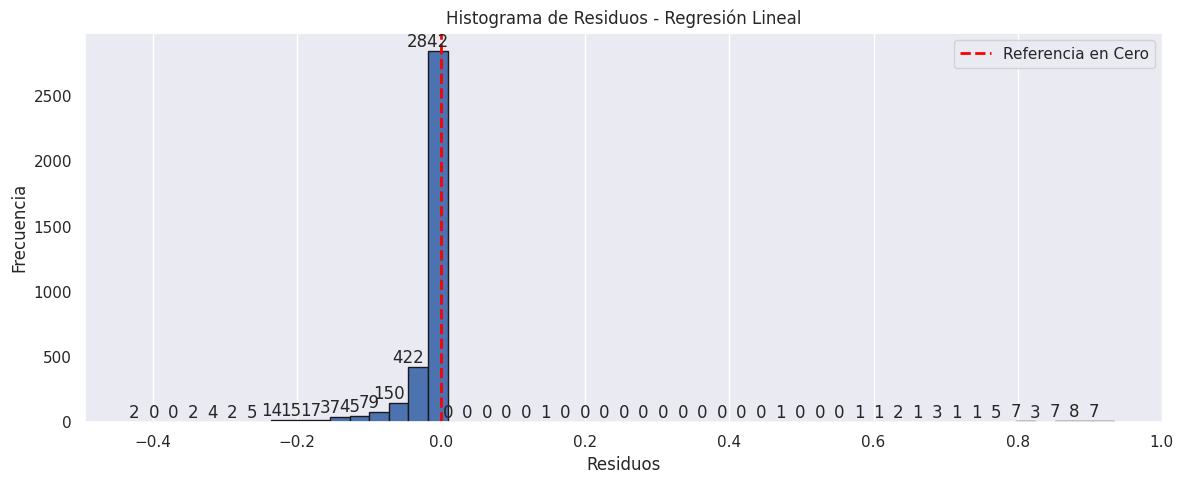

In [156]:
# Visualización de residuos
linear_residuals = y_test - linear_predictions

plt.figure(figsize=(12, 5))

# Graficar el histograma de los residuos
hist, bins, _ = plt.hist(linear_residuals, bins=50, edgecolor='k')

plt.title('Histograma de Residuos - Regresión Lineal')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

# Añadir una línea vertical en cero como referencia
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Referencia en Cero')

# Colocar las frecuencias en la gráfica
for i in range(len(hist)):
    plt.text(bins[i], hist[i], str(int(hist[i])), ha='center', va='bottom')

# Ajustar la ubicación de los ticks del eje x si es necesario
# plt.xticks(np.arange(-120, 121, 20))
plt.grid(axis='x')
plt.legend()
plt.tight_layout()
plt.show()


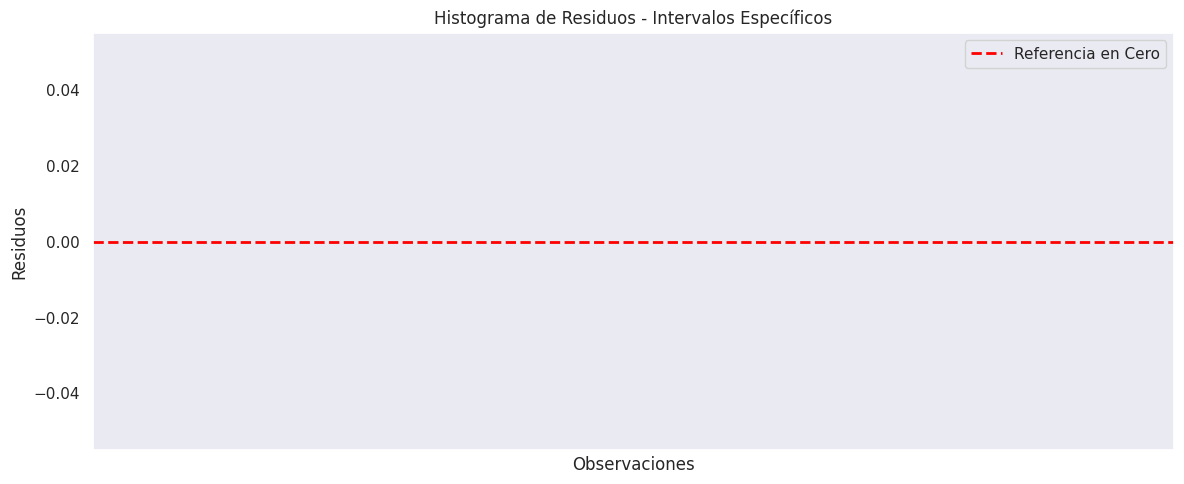

In [157]:
# Verificando nuestros residuos en intervalos menores para ver su distribución
plt.figure(figsize=(12, 5))

# Filtrar residuos que están fuera del rango específico
filtered_residuals = linear_residuals[(linear_residuals != 0) & ((linear_residuals < -10) | (linear_residuals > 10))]

# Graficar el histograma de los residuos filtrados
plt.bar(np.arange(len(filtered_residuals)), filtered_residuals, color='blue', edgecolor='k')

plt.title('Histograma de Residuos - Intervalos Específicos')
plt.xlabel('Observaciones')
plt.ylabel('Residuos')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Referencia en Cero')

# Ajustar la ubicación de los ticks del eje x si es necesario
plt.xticks(np.arange(0, len(filtered_residuals), 25), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [163]:
# Calcular métricas para el modelo de Regresión Lineal
linear_predictions = model_linear.predict(x_test)
linear_residuals = y_test - linear_predictions

r2_linear = r2_score(y_test, linear_predictions) * 100
rmse_linear = np.sqrt(mean_squared_error(y_test, linear_predictions))
mae_linear = mean_absolute_error(y_test, linear_predictions)

# Almacenar las métricas en una lista para su referencia o informe posterior
linear_metrics = [r2_linear, rmse_linear, mae_linear]


## 5. EVALUACIÓN Y SELECCIÓN DEL MODELO

In [179]:
# Verificar longitudes de las listas de métricas
print("Longitud de lgb_metrics:", len(lgb_metrics))
print("Longitud de xgb_metrics:", len(xgb_metrics))
print("Longitud de rf_metrics:", len(rf_metrics))
print("Longitud de linear_metrics:", len(linear_metrics))


Longitud de lgb_metrics: 3
Longitud de xgb_metrics: 3
Longitud de rf_metrics: 3
Longitud de linear_metrics: 3


In [180]:
print("lgb_metrics:", lgb_metrics)
print("xgb_metrics:", xgb_metrics)
print("rf_metrics:", rf_metrics)
print("linear_metrics:", linear_metrics)

lgb_metrics: [19.854549482459593, 0.10357123498982973, 0.020688191307056847]
xgb_metrics: (0.24341926729986432, 0.01625441696113074, 0.92)
rf_metrics: [22.65376298929308, 0.10174646101623057, 0.021372427213108617]
linear_metrics: [22.077891017045705, 0.10212452903815518, 0.03133271563708569]


In [181]:
# Alinear longitudes (por ejemplo, truncar a la longitud mínima)
min_length = min(len(lgb_metrics), len(xgb_metrics), len(rf_metrics), len(linear_metrics))
lgb_metrics = lgb_metrics[:min_length]
xgb_metrics = xgb_metrics[:min_length]
rf_metrics = rf_metrics[:min_length]
linear_metrics = linear_metrics[:min_length]


In [182]:
modelos = ['LGBoost', 'XGBoost', 'Random Forest', 'Linear Regression']
metricas = ['R2', 'RMSE', 'MAE']

In [188]:
# Nombres de modelos
modelos = ['LightGBM', 'XGBoost', 'Random Forest', 'Regresión Lineal']

# Crear DataFrame con métricas
comparativo_metricas = pd.DataFrame({
    'Métricas': ['R2 Score', 'RMSE', 'MAE'],
    modelos[0]: [round(r2_lgb, 2), round(rmse_lgb, 2), round(mae_lgb, 2)],
    modelos[1]: [round(r2_xgb, 2), round(rmse_xgb, 2), round(mae_xgb, 2)],
    modelos[2]: [round(r2_rf, 2), round(rmse_rf, 2), round(mae_rf, 2)],
    modelos[3]: [round(r2_linear, 2), round(rmse_linear, 2), round(mae_linear, 2)]
})

# Establecer 'Modelo' como índice
comparativo_metricas.set_index('Métricas', inplace=True)

# Mostrar DataFrame con formato
comparativo_metricas.style.background_gradient()




,LightGBM,XGBoost,Random Forest,Regresión Lineal
Métricas,,,,
R2 Score,19.850000,17.560000,22.650000,22.080000
RMSE,0.100000,0.110000,0.100000,0.100000
MAE,0.020000,0.020000,0.020000,0.030000


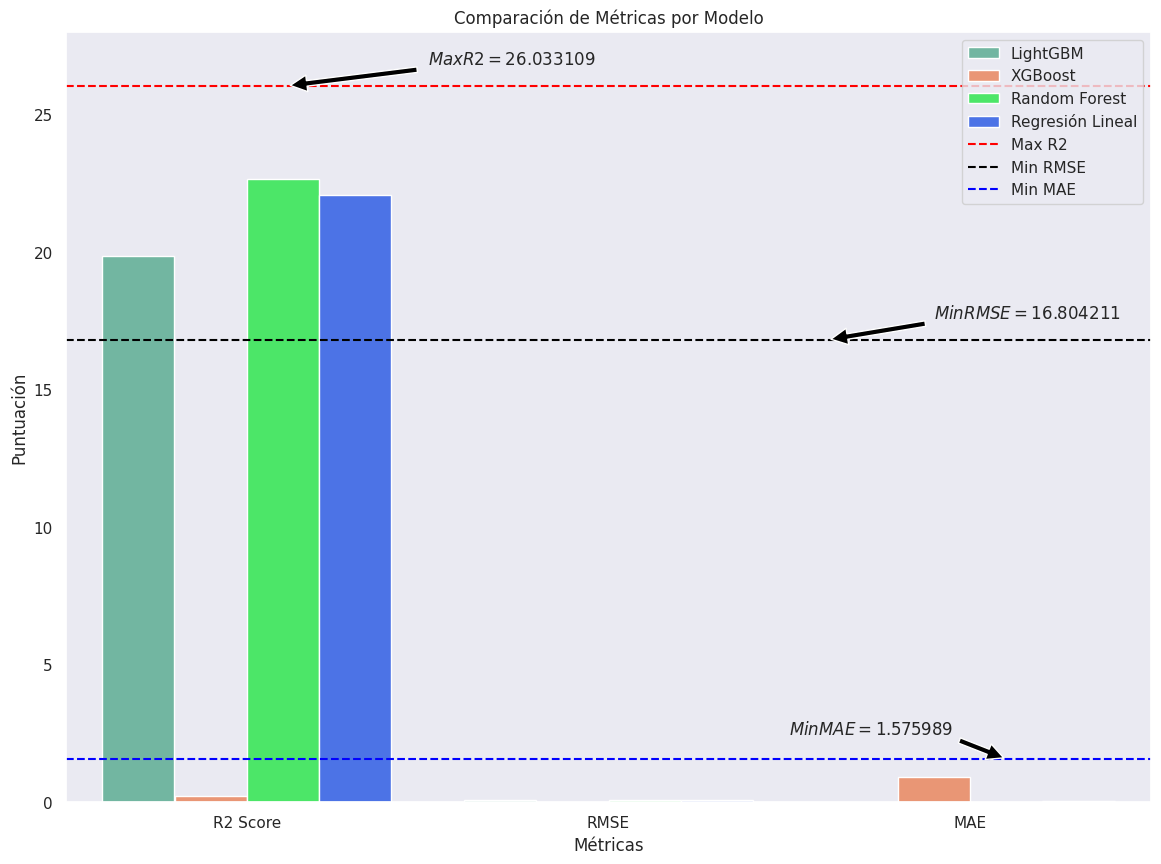

In [196]:
plt.figure(figsize=(14, 10))
colors = ['#66c2a5', '#fc8d62', "#33FF57", "#3366FF"]

sns.barplot(data=comparativo_metricas.melt(id_vars='Métricas'), x='Métricas', y='value', hue='variable', palette=colors)
plt.xlabel('Métricas')
plt.ylabel('Puntuación')
ax = plt.gca()  # Obtiene el objeto de los ejes
ax.set_ylim(bottom=0, top=28)
plt.axhline(y=26.033109, color='red', linestyle='--', label='Max R2')
plt.axhline(y=16.804211, color='black', linestyle='--', label='Min RMSE')
plt.axhline(y=1.575989, color='blue', linestyle='--', label='Min MAE')
plt.annotate('$Max R2 = 26.033109$', xy=(0.1, 26.033109), xytext=(0.5, 26.033109 + 0.8), fontsize=12,
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('$Min RMSE = 16.804211$', xy=(1.6, 16.804211), xytext=(1.9, 16.804211 + 0.8), fontsize=12,
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('$Min MAE = 1.575989$', xy=(2.1, 1.575989), xytext=(1.5, 1.575989 + 0.9), fontsize=12,
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('Comparación de Métricas por Modelo')
plt.legend();



## 6. PRODUCCIÓN

In [197]:
df_traffic_production = df_traffic_new.copy()

In [205]:
x = df_traffic_production.drop(columns='transactionRevenue')
y = df_traffic_production['transactionRevenue']

## Estandarizamos nuestros datos
scaled = StandardScaler()
x_scaled_before = scaled.fit_transform(x)

x['classification'] = model_classification.predict(x_scaled_before)

## Estandarizamos nuevamente nuestro conjunto de datos X
scaled = StandardScaler()
x_scaled_after = scaled.fit_transform(x)

In [206]:
real_predictions = rf_best_model.predict(x_scaled_after)
real_predictions[real_predictions<1] = 0

ValueError: X has 39 features, but RandomForestRegressor is expecting 38 features as input.

In [207]:
print("Características utilizadas durante el ajuste:")
print(rf_best_model.feature_importances_)


Características utilizadas durante el ajuste:
[0.01634685 0.04787886 0.00680035 0.         0.         0.02181324
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00731401 0.01045753
 0.00512211 0.01731147 0.04791745 0.06365535 0.         0.04077541
 0.         0.         0.         0.23601067 0.28585355 0.0108742
 0.02355653 0.00176964 0.01411358 0.01580209 0.01156914 0.04665819
 0.04072774 0.02767202]


SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-209-6623b42eff6f>, line 2)

**MSE (Error Cuadrático Medio):**
El MSE mide la magnitud promedio de los errores cuadráticos entre las predicciones y los valores reales. Un MSE alto significa que las predicciones están bastante alejadas de los valores reales. En este caso, el valor alto del MSE indica que el modelo no está ajustando bien los datos.

**R2 Score (Coeficiente de Determinación):**
El R2 Score cuantifica la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Un R2 Score cercano a cero sugiere que el modelo no está explicando bien la variabilidad en los datos de destino. Un R2 negativo indica que el modelo es peor que un modelo que simplemente predice la media de la variable dependiente.








In [201]:
x_scaled_after = scaled.transform(x)

real_predictions = rf_best_model.predict(x_scaled_after)
real_predictions[real_predictions<1] = 0

In [204]:
# Separa la data en conjuntos X y Y
x = df_traffic_production.drop(columns='transactionRevenue')
y = df_traffic_production['transactionRevenue']

# Estandariza los datos
scaler = StandardScaler()
x_scaled_before = scaler.fit_transform(x)

# Añade la característica 'classification'
x['classification'] = model_classification.predict(x_scaled_before)

# Estandariza nuevamente el conjunto de datos X
scaler = StandardScaler()
x_scaled_after = scaler.transform(x)

# Realiza las predicciones
real_predictions = rf_best_model.predict(x_scaled_after)
real_predictions[real_predictions < 1] = 0

# Elimina la característica 'classification'
x = x.drop(columns='classification')

# Realiza las predicciones
real_predictions = rf_best_model.predict(x)
real_predictions[real_predictions < 1] = 0


NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.